# MS2Deepscore
## Explore potential of MS2DeepScore spectral embeddings for clustering (e.g. t-SNE based)

In [1]:
import os
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

path_root = os.path.dirname(os.path.dirname(os.getcwd()))
path_data = os.path.join(path_root, 'Data')
path_models = os.path.join(path_root, 'SURF_model_training_runs')

In [2]:
filename = os.path.join(path_data, 'GNPS_all', 'ALL_GNPS_positive_test_split_210301.pickle')
with open(filename, 'rb') as file:
    spectrums_test = pickle.load(file)

print(f"{len(spectrums_test)} spectra imported.")

3601 spectra imported.


In [3]:
identifier_test = [s.get("spectrumid") for s in spectrums_test]
inchi_test = [s.get("inchi") for s in spectrums_test]

In [4]:
inchi_test[0]

'InChI=1S/C36H20N2O4/c39-21-13-9-19(10-14-21)17-25-33-29(23-5-1-3-7-27(23)37-33)31(35(25)41)32-30-24-6-2-4-8-28(24)38-34(30)26(36(32)42)18-20-11-15-22(40)16-12-20/h1-18,39-40H/b25-17+,26-18+'

In [5]:
inchi_combined = [[identifier_test[i],inchi_test[i]] for i in range(len(inchi_test))]

In [6]:
inchi_combined[:10]

[['CCMSLIB00000001550',
  'InChI=1S/C36H20N2O4/c39-21-13-9-19(10-14-21)17-25-33-29(23-5-1-3-7-27(23)37-33)31(35(25)41)32-30-24-6-2-4-8-28(24)38-34(30)26(36(32)42)18-20-11-15-22(40)16-12-20/h1-18,39-40H/b25-17+,26-18+'],
 ['CCMSLIB00000001615',
  'InChI=1S/C20H34O3/c1-7-17-12-15(5)20(23,16(6)19(17)22)10-9-13(3)11-14(4)18(21)8-2/h9-11,14-18,21,23H,7-8,12H2,1-6H3/b10-9+,13-11+/t14-,15+,16+,17-,18+,20+/m1/s1'],
 ['CCMSLIB00000001616',
  'InChI=1S/C20H34O3/c1-7-17-12-15(5)20(23,16(6)19(17)22)10-9-13(3)11-14(4)18(21)8-2/h9-11,14-18,21,23H,7-8,12H2,1-6H3/b10-9+,13-11+/t14-,15+,16+,17-,18+,20+/m1/s1'],
 ['CCMSLIB00000006890',
  '"InChI=1S/C52H91N7O13/c1-29(2)19-17-15-13-14-16-18-20-35-27-42(60)53-36(21-22-43(61)62)46(65)54-37(23-30(3)4)47(66)56-39(25-32(7)8)50(69)59-45(34(11)12)51(70)57-40(28-44(63)64)49(68)55-38(24-31(5)6)48(67)58-41(26-33(9)10)52(71)72-35/h29-41,45H,13-28H2,1-12H3,(H,53,60)(H,54,65)(H,55,68)(H,56,66)(H,57,70)(H,58,67)(H,59,69)(H,61,62)(H,63,64)/t35-,36+,37+,38-,39-,40+,41+,4

In [7]:
# write to csv

#import csv

#with open('inchi_combined.csv', 'w', newline='') as file:
#    writer = csv.writer(file, quoting=csv.QUOTE_ALL, delimiter='\t')
#    writer.writerows(inchi_combined)

In [8]:
smiles_test = [s.get("smiles") for s in spectrums_test]

In [9]:
smiles_test[0]

'OC1=CC=C(\\C=C2\\C(=O)C(C3=C4C5=C(C=CC=C5)N=C4\\C(=C/C4=CC=C(O)C=C4)C3=O)=C3C4=C(C=CC=C4)N=C23)C=C1'

In [10]:
# write to csv
#import csv

#with open('smiles_list.csv', 'w', newline='') as file:
#    writer = csv.writer(file, quoting=csv.QUOTE_ALL, delimiter=';')
#    writer.writerows([[i] for i in smiles_test])

In [11]:
inchikeys_test = [s.get("inchikey") for s in spectrums_test]

In [12]:
# write to csv

#with open('inchikeys_list.csv', 'w', newline='') as file:
#    writer = csv.writer(file, quoting=csv.QUOTE_ALL, delimiter=';')
#    writer.writerows([[i] for i in inchikeys_test])

In [13]:
inchikeys_test_unique = {s.get("inchikey") for s in spectrums_test}

In [14]:
len(inchikeys_test_unique)

581

In [15]:
# write to csv

#with open('inchikeys_list.csv', 'w', newline='') as file:
#    writer = csv.writer(file, quoting=csv.QUOTE_ALL, delimiter=';')
#    writer.writerows([[i] for i in inchikeys_test_unique])

Run the inchikeys via https://cfb.fiehnlab.ucdavis.edu/

In [16]:
path_classyfire = "C:\\OneDrive - Netherlands eScience Center\\Manuscripts\\MS2DeepScore\\analysis"
filename = os.path.join(path_classyfire, "classyfire_20210311130703.csv")

classyfire = pd.read_csv(filename).fillna(0)
classyfire.head()

InChIKey ClassyFy Status            Kingdom  \
0  JGSARLDLIJGVTE-MBNYWOFBSA-N       Completed  Organic compounds   
1  GWHQHAUAXRMMOT-MBANBULQSA-N       Completed  Organic compounds   
2  DBEPLOCGEIEOCV-WSBQPABSSA-N       Completed  Organic compounds   
3  WQXNXVUDBPYKBA-UHFFFAOYSA-N       Completed  Organic compounds   
4  RPJBXUNEXVNBIF-UHFFFAOYSA-N       Completed  Organic compounds   

                        Superclass                                Class  \
0    Organic acids and derivatives     Carboxylic acids and derivatives   
1                       Benzenoids  Benzene and substituted derivatives   
2  Lipids and lipid-like molecules     Steroids and steroid derivatives   
3    Organic acids and derivatives     Carboxylic acids and derivatives   
4    Organic acids and derivatives                      Peptidomimetics   

                               Subclass               Parent Level 1  \
0  Amino acids, peptides, and analogues                     Peptides   
1                     Phenoxy compounds            Phenoxy compounds   
2                   Androstane steroids    Androgens and derivatives   
3  Amino acids, peptides, and analogues  Amino acids and derivatives   
4                         Depsipeptides         Cyclic depsipeptides   

                      Parent Level 2 Parent Level 3 Parent Level 4  \
0                         Dipeptides              0              0   
1                                  0              0              0   
2                                  0              0              0   
3  Alpha amino acids and derivatives              0              0   
4                                  0              0              0   

  Parent Level 5  
0              0  
1              0  
2              0  
3              0  
4              0

In [17]:
from sklearn import manifold, datasets

## Create embeddings

In [18]:
# import spectrum binner
outfile = os.path.join(path_data, 'GNPS_all',
                       'ALL_GNPS_positive_training_spectrum_binner_210301_10k.pickle')
with open(outfile, 'rb') as file:
    spectrum_binner = pickle.load(file)  

In [19]:
import tensorflow as tf
from tensorflow.keras.models import load_model as load_keras_model
keras_model_file = os.path.join(path_models, "trained_models", "20210326-191145_Test_10k_500_500_200.hdf5")
keras_model = load_keras_model(keras_model_file)

In [20]:
from ms2deepscore.models import SiameseModel
from ms2deepscore import MS2DeepScore

model = SiameseModel(spectrum_binner, keras_model=keras_model)
similarity_score = MS2DeepScore(model)

In [21]:
#embeddings = similarity_score.calculate_vectors(spectrums_test)

In [22]:
# Save embeddings

#predictions_file = os.path.join(path_models, "trained_models", "embeddings_test_20210326-191145_Test_10k_500_500_200.npy")
#np.save(predictions_file, embeddings)

In [23]:
# Load embeddings

#predictions_file = os.path.join(path_models, "trained_models", "embeddings_test_20210326-191145_Test_10k_500_500_200.npy")
#embeddings = np.load(predictions_file)

## Prepare labels -> Convert classes to numbers

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = classyfire["Class"].to_list()
y = label_encoder.fit_transform(labels)
print(y[:30])
print(labels[:30])

[21 12 89 21 69 30 21 92 27  0 78 84 21 12 42 29 66  0  7 46 29 67 78 25
 69 36 89 25 12 28]
['Carboxylic acids and derivatives', 'Benzene and substituted derivatives', 'Steroids and steroid derivatives', 'Carboxylic acids and derivatives', 'Peptidomimetics', 'Diazinanes', 'Carboxylic acids and derivatives', 'Tannins', 'Depsides and depsidones', 0, 'Prenol lipids', 'Pyrimidine nucleotides', 'Carboxylic acids and derivatives', 'Benzene and substituted derivatives', 'Indoles and derivatives', 'Diazanaphthalenes', 'Organooxygen compounds', 0, 'Aspidofractine alkaloids', 'Isoflavonoids', 'Diazanaphthalenes', 'Oxanes', 'Prenol lipids', 'Coumarins and derivatives', 'Peptidomimetics', 'Fatty Acyls', 'Steroids and steroid derivatives', 'Coumarins and derivatives', 'Benzene and substituted derivatives', 'Diarylheptanoids']


In [25]:
#inchikeys14_test = np.array([s.get("inchikey") for s in spectrums_test])
inchikeys14_classyfire = np.array([x[:14] for x in classyfire["InChIKey"].to_list()])

labels_test = []
for spec in spectrums_test:
    inchikey14 = spec.get("inchikey")[:14]
    if inchikey14 in inchikeys14_classyfire:
        idx = np.where(inchikeys14_classyfire == inchikey14)
        label = classyfire["Class"].iloc[idx].to_list()
        if len(label) > 1:
            lengths = np.array([len(x) for x in label if isinstance(x, str)])
            label = label[np.argmax(lengths)]
            print(f"{label} selected")
            label_num = y[idx[0][np.argmax(lengths)]]
        else:
            label_num = y[idx[0][0]]
            
        labels_test.append(label_num)
        
    else:
        labels_test.append(-1)


Peptidomimetics selected
Peptidomimetics selected
Peptidomimetics selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Organooxygen compounds selected
Organooxygen compounds selected
Organooxygen compounds selected
Phthalide isoquinolines selected
Phthalide isoquinolines selected
Phthalide isoquinolines selected
Phthalide isoquinolines selected
Organooxygen compounds selected
Organooxygen compounds selected
Organooxygen compounds selected
Organooxygen compounds selected
Organooxygen compounds selected
Quinolines and derivatives selected
Quinolines and derivatives selected
Quinolines and derivatives selected
Quinolines and derivatives selected
Peptidomimetics selected
Flavonoids selected
Macrolides and analogues selected
Flavonoids selected
Prenol lipids selected
Flavonoids selected
Carboxylic acids and derivatives selected

Piperidines selected
Carboxylic acids and derivatives selected
Peptidomimetics selected
Carboxylic acids and derivatives selected
Phthalide isoquinolines selected
Carboxylic acids and derivatives selected
Piperidines selected
Phthalide isoquinolines selected
Phthalide isoquinolines selected
Peptidomimetics selected
Peptidomimetics selected
Peptidomimetics selected
Peptidomimetics selected
Piperidines selected
Peptidomimetics selected
Benzoxazines selected
Benzoxazines selected
Piperidines selected
Peptidomimetics selected
Piperidines selected
Phthalide isoquinolines selected
Benzoxazines selected
Benzoxazines selected
Benzoxazines selected
Phthalide isoquinolines selected
Benzoxazines selected
Piperidines selected
Carboxylic acids and derivatives selected
Piperidines selected
Carboxylic acids and derivatives selected
Piperidines selected
Steroids and steroid derivatives selected
Carboxylic acids and derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid der

Piperidines selected
Steroids and steroid derivatives selected
Carboxylic acids and derivatives selected
Benzoxazines selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Carboxylic acids and derivatives selected
Benzoxazines selected
Tropones selected
Cinnamic acids and derivatives selected
Piperidines selected
Organooxygen compounds selected
Organooxygen compounds selected
Steroids and steroid derivatives selected
Cinnamic acids and derivatives selected
Tropones selected
Carboxylic acids and derivatives selected
Piperidines selected
Organooxygen compounds selected
Steroids and steroid derivatives selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Benzoxazines selected
Piperidines selected
Steroids and steroid derivatives selected
Steroids

In [26]:
inchikeys14_classyfire = np.array([x[:14] for x in classyfire["InChIKey"].to_list()])

labels_test_class = []
labels_test_class_str = []
for spec in spectrums_test:
    inchikey14 = spec.get("inchikey")[:14]
    if inchikey14 in inchikeys14_classyfire:
        idx = np.where(inchikeys14_classyfire == inchikey14)
        label = classyfire["Class"].iloc[idx].to_list()

        if len(label) > 1:
            #print(label)
            possible_labels = np.array([(x != 0) for x in label])
            if True in possible_labels:
                pick = np.where(possible_labels == True)[0][0]
            else:
                pick = 0
            #print(possible_labels)
            #lengths = np.array([len(x) for x in label if isinstance(x, str)])
            #print(lengths)
            label = label[pick]
            if label == 0:
                label = "0, unknown"
            print(f"{label} selected")
            label_num = y[idx[0][pick]]
        else:
            label = label[0]
            label_num = y[idx[0][0]]
            if label == 0:
                label = "0, unknown"
            
        labels_test_class.append(label_num)
        labels_test_class_str.append(label)
        
    else:
        labels_test_class.append(-1)
        labels_test_class_str.append("unknown")


Peptidomimetics selected
Peptidomimetics selected
Peptidomimetics selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Organooxygen compounds selected
Organooxygen compounds selected
Organooxygen compounds selected
Phthalide isoquinolines selected
Phthalide isoquinolines selected
Phthalide isoquinolines selected
Phthalide isoquinolines selected
Organooxygen compounds selected
Organooxygen compounds selected
Organooxygen compounds selected
Organooxygen compounds selected
Organooxygen compounds selected
Quinolines and derivatives selected
Quinolines and derivatives selected
Quinolines and derivatives selected
Quinolines and derivatives selected
Peptidomimetics selected
Flavonoids selected
Macrolides and analogues selected
Flavonoids selected
Prenol lipids selected
Flavonoids selected
Carboxylic acids and derivatives selected

Phthalide isoquinolines selected
Phthalide isoquinolines selected
Phthalide isoquinolines selected
Phthalide isoquinolines selected
Phthalide isoquinolines selected
Cinnamic acids and derivatives selected
Cinnamic acids and derivatives selected
Cinnamic acids and derivatives selected
Purine nucleotides selected
Flavonoids selected
Flavonoids selected
Piperidines selected
Piperidines selected
Piperidines selected
Piperidines selected
Organooxygen compounds selected
Organooxygen compounds selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives sele

Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Steroids and steroid derivatives selected
Phthalide isoquinolines selected
Carboxylic acids and derivatives selected
Peptidomimetics selected
Peptidomimetics selected
Benzoxazines selected
Benzoxazines selected
Benzoxazines selected
Benzoxazines selected
Benzoxazines selected
Benzoxazines selected
Benzoxazines selected
Piperidines selected
Piperidines selected
Piperidines selected
Piperidines selected
Peptidomimetics selected
Peptidomimetics selected
Benzoxazines selected
Phthalide isoquinolines selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Carboxylic acids and derivatives selected
Phthalide isoquinolines selected
Carboxylic acids and derivatives selected
Steroids and steroid derivatives selected
Carboxylic acids and derivatives sele

Organooxygen compounds selected
Prenol lipids selected
Steroids and steroid derivatives selected
Organooxygen compounds selected
Steroids and steroid derivatives selected
Organooxygen compounds selected
Organooxygen compounds selected
Organooxygen compounds selected
Carboxylic acids and derivatives selected
Organooxygen compounds selected
Piperidines selected
Lactones selected
Steroids and steroid derivatives selected
Benzoxazines selected
Carboxylic acids and derivatives selected
Organooxygen compounds selected
Organooxygen compounds selected
Organooxygen compounds selected


In [27]:
label

'Glycerolipids'

In [28]:
label_encoder.transform([label])

array([38])

In [29]:
label_encoder = LabelEncoder()
labels_superclass = classyfire["Superclass"].to_list()
y = label_encoder.fit_transform(labels_superclass)

In [30]:
classyfire["Superclass"].iloc[39]

0

In [31]:
inchikeys14_classyfire = np.array([x[:14] for x in classyfire["InChIKey"].to_list()])

labels_test_superclass = []
labels_test_superclass_str = []
for spec in spectrums_test:
    inchikey14 = spec.get("inchikey")[:14]
    if inchikey14 in inchikeys14_classyfire:
        idx = np.where(inchikeys14_classyfire == inchikey14)
        label = classyfire["Superclass"].iloc[idx].to_list()

        if len(label) > 1:
            #print(label)
            possible_labels = np.array([(x != 0) for x in label])
            pick = (possible_labels == True)[0]
            #print(possible_labels)
            #lengths = np.array([len(x) for x in label if isinstance(x, str)])
            #print(lengths)
            label = label[pick]
            if label == 0:
                label = "0, unknown"
            print(f"{label} selected")
            label_num = y[idx[0][pick]]
        else:
            label = label[0]
            label_num = y[idx[0][0]]
            if label == 0:
                label = "0, unknown"
            
        labels_test_superclass.append(label_num)
        labels_test_superclass_str.append(label)
        
    else:
        labels_test_superclass.append(-1)
        labels_test_superclass_str.append("unknown")


Organic acids and derivatives selected
Organic acids and derivatives selected
Organic acids and derivatives selected
Organic acids and derivatives selected
Organic acids and derivatives selected
Organic acids and derivatives selected
Organic acids and derivatives selected
Organic acids and derivatives selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Alkaloids and derivatives selected
Alkaloids and derivatives selected
Alkaloids and derivatives selected
Alkaloids and derivatives selected

<ipython-input-31-3a7d798951c5>:18: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  label = label[pick]



Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organoheterocyclic compounds selected
Organoheterocyclic compounds selected
Organoheterocyclic compounds selected
Organoheterocyclic compounds selected
Organic acids and derivatives selected
Phenylpropanoids and polyketides selected
Phenylpropanoids and polyketides selected
Phenylpropanoids and polyketides selected
Lipids and lipid-like molecules selected
Phenylpropanoids and polyketides selected
Organic acids and derivatives selected
Lipids and lipid-like molecules selected
Organic acids and derivatives selected
Phenylpropanoids and polyketides selected
Lipids and lipid-like molecules selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown selected
Organic acids and derivatives selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molec

Phenylpropanoids and polyketides selected
Phenylpropanoids and polyketides selected
Organoheterocyclic compounds selected
Organoheterocyclic compounds selected
Organoheterocyclic compounds selected
Organoheterocyclic compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Alkaloids and derivatives selected
Alkaloids and derivatives selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Organic acids and derivatives selected
Lipids and li

Phenylpropanoids and polyketides selected
Phenylpropanoids and polyketides selected
Phenylpropanoids and polyketides selected
Organic oxygen compounds selected
Phenylpropanoids and polyketides selected
Phenylpropanoids and polyketides selected
Nucleosides, nucleotides, and analogues selected
Phenylpropanoids and polyketides selected
Organic oxygen compounds selected
Alkaloids and derivatives selected
Hydrocarbon derivatives selected
Alkaloids and derivatives selected
Organic acids and derivatives selected
Organic oxygen compounds selected
Lipids and lipid-like molecules selected
Hydrocarbon derivatives selected
Organic acids and derivatives selected
Organic oxygen compounds selected
Organic acids and derivatives selected
Hydrocarbon derivatives selected
Alkaloids and derivatives selected
Lipids and lipid-like molecules selected
Organic oxygen compounds selected
Hydrocarbon derivatives selected
Lipids and lipid-like molecules selected
Organic acids and derivatives selected
Lipids and li

Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Lipids and lipid-like molecules selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds selected
Organic oxygen compounds s

In [32]:
inchikeys14_classyfire = np.array([x[:14] for x in classyfire["InChIKey"].to_list()])

labels_test_subclass = []
labels_test_subclass_str = []
for spec in spectrums_test:
    inchikey14 = spec.get("inchikey")[:14]
    if inchikey14 in inchikeys14_classyfire:
        idx = np.where(inchikeys14_classyfire == inchikey14)
        label = classyfire["Subclass"].iloc[idx].to_list()

        if len(label) > 1:
            #print(label)
            possible_labels = np.array([(x != 0) for x in label])
            if True in possible_labels:
                pick = np.where(possible_labels == True)[0][0]
            else:
                pick = 0
            #print(possible_labels)
            #lengths = np.array([len(x) for x in label if isinstance(x, str)])
            #print(lengths)
            label = label[pick]
            if label == 0:
                label = "0, unknown"
            print(f"{label} selected")
            label_num = y[idx[0][pick]]
        else:
            label = label[0]
            label_num = y[idx[0][0]]
            if label == 0:
                label = "0, unknown"
            
        labels_test_subclass.append(label_num)
        labels_test_subclass_str.append(label)
        
    else:
        labels_test_subclass.append(-1)
        labels_test_subclass_str.append("unknown")


Depsipeptides selected
Depsipeptides selected
Depsipeptides selected
Amino acids, peptides, and analogues selected
Amino acids, peptides, and analogues selected
Amino acids, peptides, and analogues selected
Amino acids, peptides, and analogues selected
Amino acids, peptides, and analogues selected
Carbohydrates and carbohydrate conjugates selected
Carbohydrates and carbohydrate conjugates selected
Carbohydrates and carbohydrate conjugates selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown selected
Carbohydrates and carbohydrate conjugates selected
Carbohydrates and carbohydrate conjugates selected
Carbohydrates and carbohydrate conjugates selected
Carbohydrates and carbohydrate conjugates selected
Carbohydrates and carbohydrate conjugates selected
Phenylquinolines selected
Phenylquinolines selected
Phenylquinolines selected
Phenylquinolines selected
Depsipeptides selected
Flavonoid glycosides selected
0, unknown selected
Flavonoid glycosides selected
Sesqui

0, unknown selected
Phenylpiperidines selected
Amino acids, peptides, and analogues selected
Phenylpiperidines selected
Amino acids, peptides, and analogues selected
Phenylpiperidines selected
Estrane steroids selected
Amino acids, peptides, and analogues selected
Estrane steroids selected
Estrane steroids selected
Amino acids, peptides, and analogues selected
Amino acids, peptides, and analogues selected
Amino acids, peptides, and analogues selected
Isoflavonoid O-glycosides selected
Isoflavonoid O-glycosides selected
0, unknown selected
Steroidal alkaloids selected
Amino acids, peptides, and analogues selected
Terpene glycosides selected
Flavonoid glycosides selected
Terpene glycosides selected
0, unknown selected
Flavonoid glycosides selected
Terpene glycosides selected
Terpene glycosides selected
Flavonoid glycosides selected
0, unknown selected
Steroidal alkaloids selected
Terpene glycosides selected
Steroidal alkaloids selected
Flavonoid glycosides selected
Flavonoid glycosides s

Hybrid peptides selected
0, unknown selected
0, unknown selected
Amino acids, peptides, and analogues selected
Amino acids, peptides, and analogues selected
Amino acids, peptides, and analogues selected
Amino acids, peptides, and analogues selected
Amino acids, peptides, and analogues selected
0, unknown selected
Amino acids, peptides, and analogues selected
Androstane steroids selected
Amino acids, peptides, and analogues selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown selected
Alcohols and polyols selected
Alcohols and polyols selected
Terpene glycosides selected
Terpene glycosides selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown selected
Androstane steroids selected
Androstane steroids selected
Lysergic acids and derivatives selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown selected
0, unknown

---
# Run t-SNE

In [33]:
from sklearn.manifold import TSNE

## Compute similarity matrix (and convert to distance matrix)

In [34]:
from matchms import calculate_scores

scores = calculate_scores(spectrums_test, spectrums_test,
                          similarity_score,
                          is_symmetric=True)

Calculating vectors of reference spectrums: 100%|██████████████████████████████████| 3601/3601 [04:01<00:00, 14.93it/s]


In [35]:
np.max(scores.scores), np.min(scores.scores)

(1.0000000000000016, 5.742532281585075e-05)

In [36]:
distances = np.max(scores.scores) - scores.scores
print(distances.max(), distances.min())

0.9999425746771857 0.0


## Compute t-SNE plot based on distance matrix

In [37]:
tsne = TSNE(n_components=2, metric="precomputed", square_distances=True, random_state=0)
X_2d = tsne.fit_transform(distances)

In [38]:
labels_test_reduced = [x if labels_test.count(x) > 5 else -1 for x in labels_test]
labels_test_reduced = label_encoder.fit_transform(labels_test_reduced)

In [39]:
np.unique(labels_test).shape

(99,)

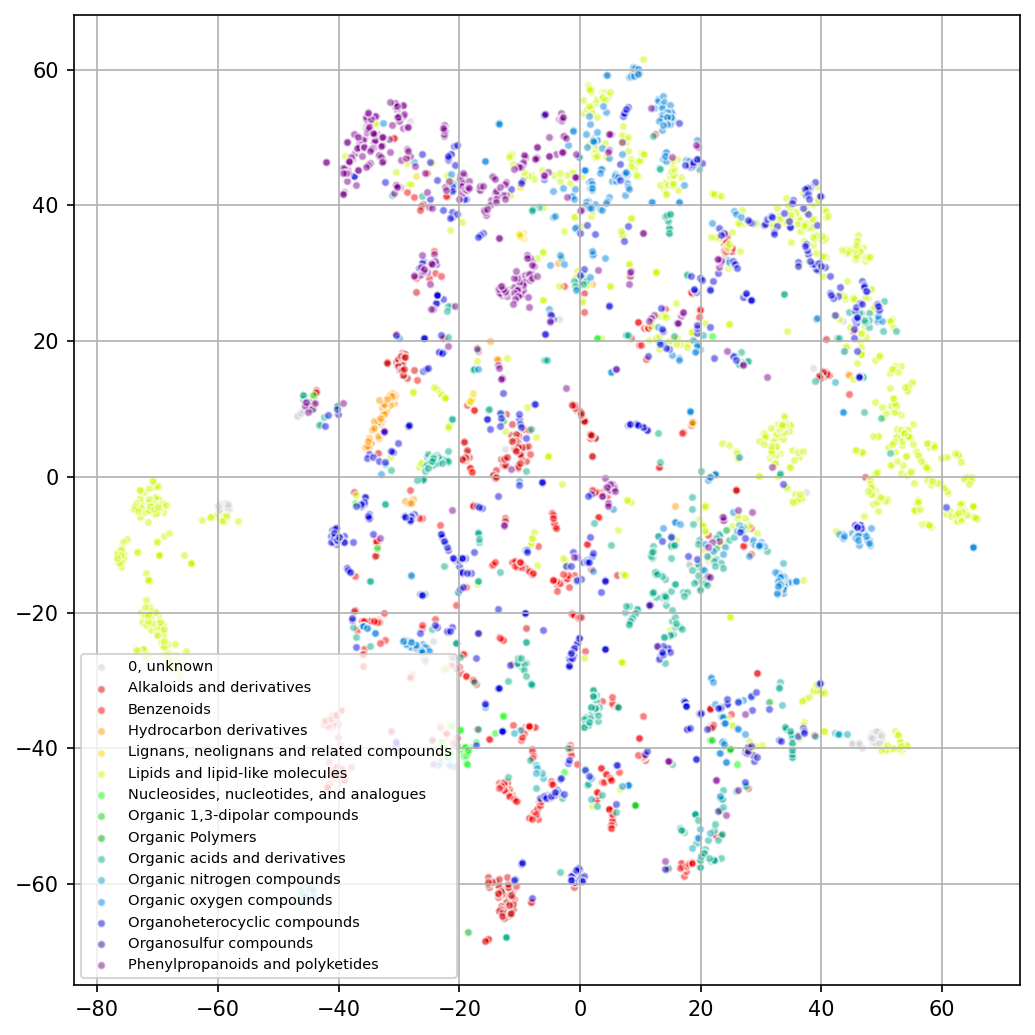

In [40]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral_r") #"turbo") #"nipy_spectral") #'inferno')

N = np.unique(labels_test_superclass_str).shape[0]

fig, ax = plt.subplots(figsize=(7, 7), dpi=150)
for i, label in enumerate(np.unique(labels_test_superclass_str)):
    idx = np.where(np.array(labels_test_superclass_str) == label)[0]
    scale = 15
    ax.scatter(X_2d[idx,1], X_2d[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.5, edgecolors='white')

ax.legend(fontsize=7)
ax.grid(True)
plt.tight_layout()
#plt.savefig("TSNE_ms2deepscore_scores_default_settings.svg")

## try different parameters

In [ ]:
tsne = TSNE(n_components=2, perplexity=200, metric="precomputed", square_distances=True, random_state=0)
X_2d = tsne.fit_transform(distances)

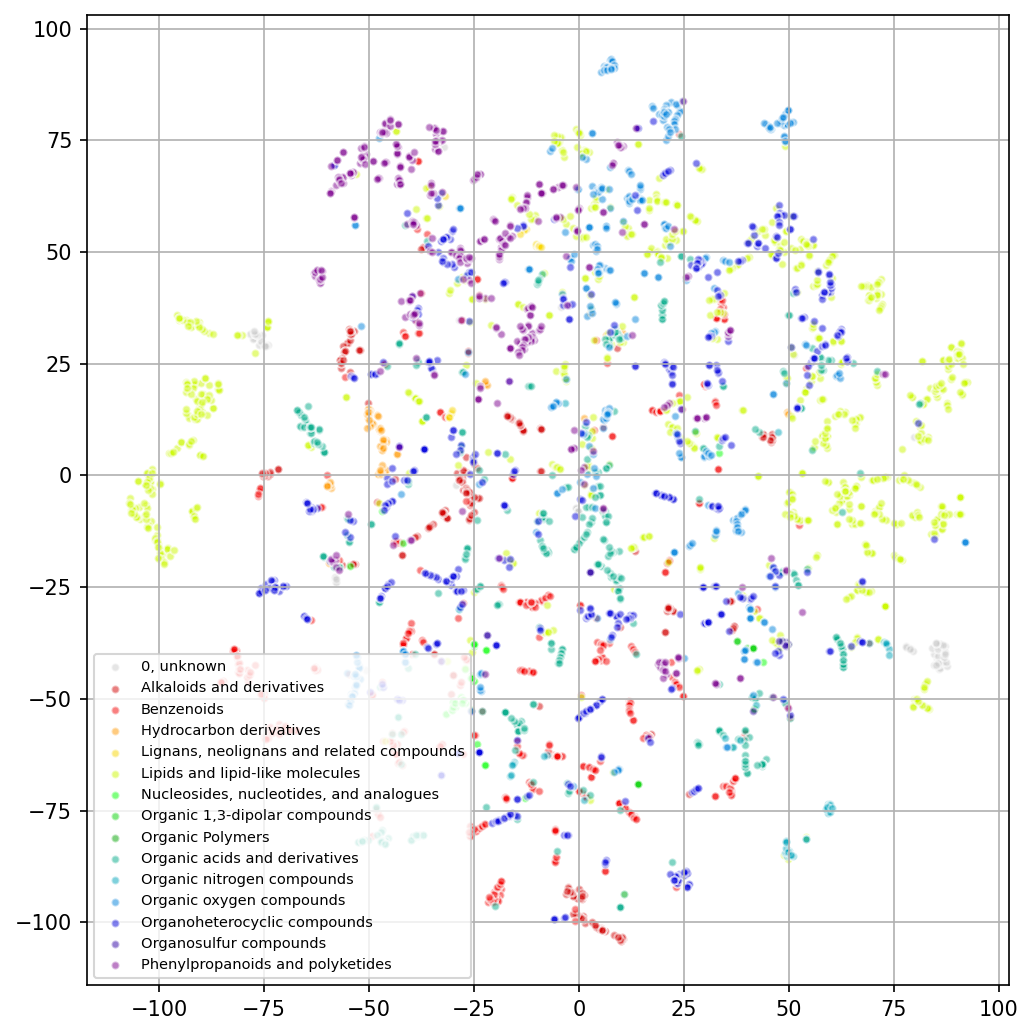

In [42]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral_r") #"turbo") #"nipy_spectral") #'inferno')

N = np.unique(labels_test_superclass_str).shape[0]

fig, ax = plt.subplots(figsize=(7, 7), dpi=150)
for i, label in enumerate(np.unique(labels_test_superclass_str)):
    idx = np.where(np.array(labels_test_superclass_str) == label)[0]
    scale = 15
    ax.scatter(X_2d[idx,1], X_2d[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.5, edgecolors='white')

ax.legend(fontsize=7)
ax.grid(True)
plt.tight_layout()
#plt.savefig("TSNE_ms2deepscore_scores_default_settings.svg")

In [ ]:
tsne = TSNE(n_components=2, perplexity=10, metric="precomputed", square_distances=True, random_state=0)
X_2d = tsne.fit_transform(distances)

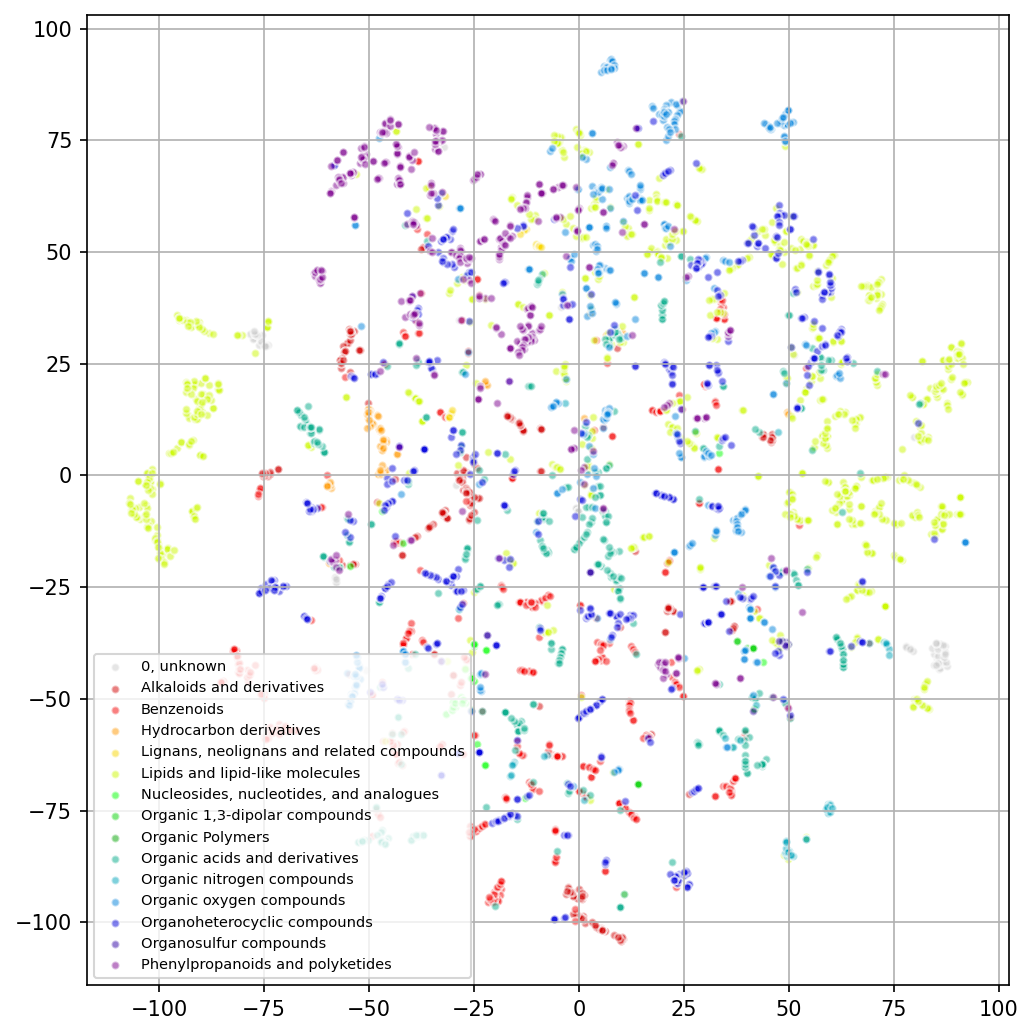

In [42]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral_r") #"turbo") #"nipy_spectral") #'inferno')

N = np.unique(labels_test_superclass_str).shape[0]

fig, ax = plt.subplots(figsize=(7, 7), dpi=150)
for i, label in enumerate(np.unique(labels_test_superclass_str)):
    idx = np.where(np.array(labels_test_superclass_str) == label)[0]
    scale = 15
    ax.scatter(X_2d[idx,1], X_2d[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.5, edgecolors='white')

ax.legend(fontsize=7)
ax.grid(True)
plt.tight_layout()
#plt.savefig("TSNE_ms2deepscore_scores_default_settings.svg")

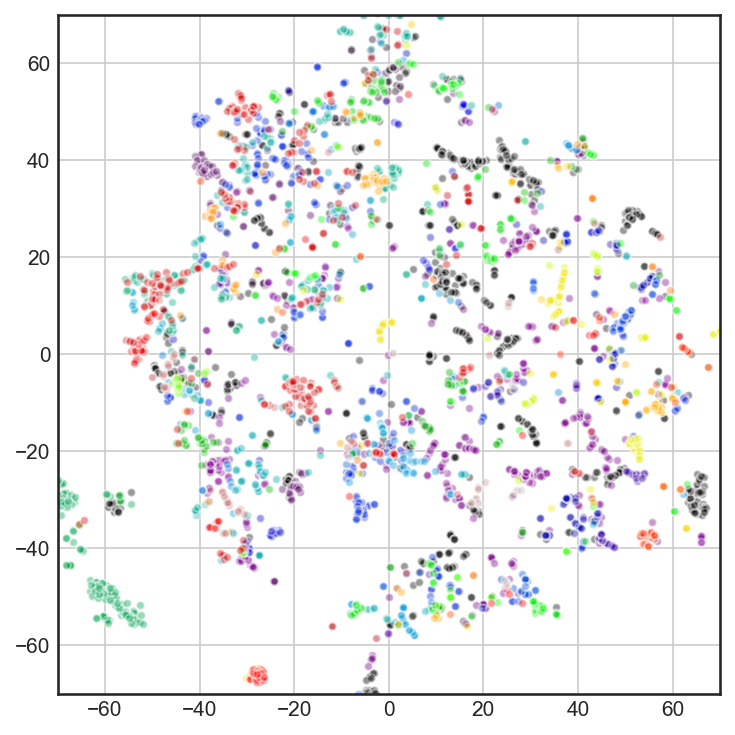

In [72]:
x_low = -70
x_high = 70
y_low = -70
y_high = 70

idx_zoom = np.where((X_2d[:,1] > x_low) & (X_2d[:,1] < x_high) & (X_2d[:,0] > y_low) & (X_2d[:,0] < y_high))[0]
idx_zoom.shape

cmap = matplotlib.cm.get_cmap("nipy_spectral") #"turbo") #"nipy_spectral") #'inferno')

selected_labels = [labels_test_subclass_str[i] for i in idx_zoom]
N = np.unique(selected_labels).shape[0]

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
for i, label in enumerate(np.unique(selected_labels)):
    idx = np.where(np.array(labels_test_subclass_str) == label)[0]
    scale = 15
    ax.scatter(X_2d[idx,1], X_2d[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.4, edgecolors='white')

#ax.legend(fontsize=5, frameon=True, facecolor="white")
ax.grid(True)
plt.xlim((x_low, x_high))
plt.ylim((y_low, y_high))
plt.tight_layout()

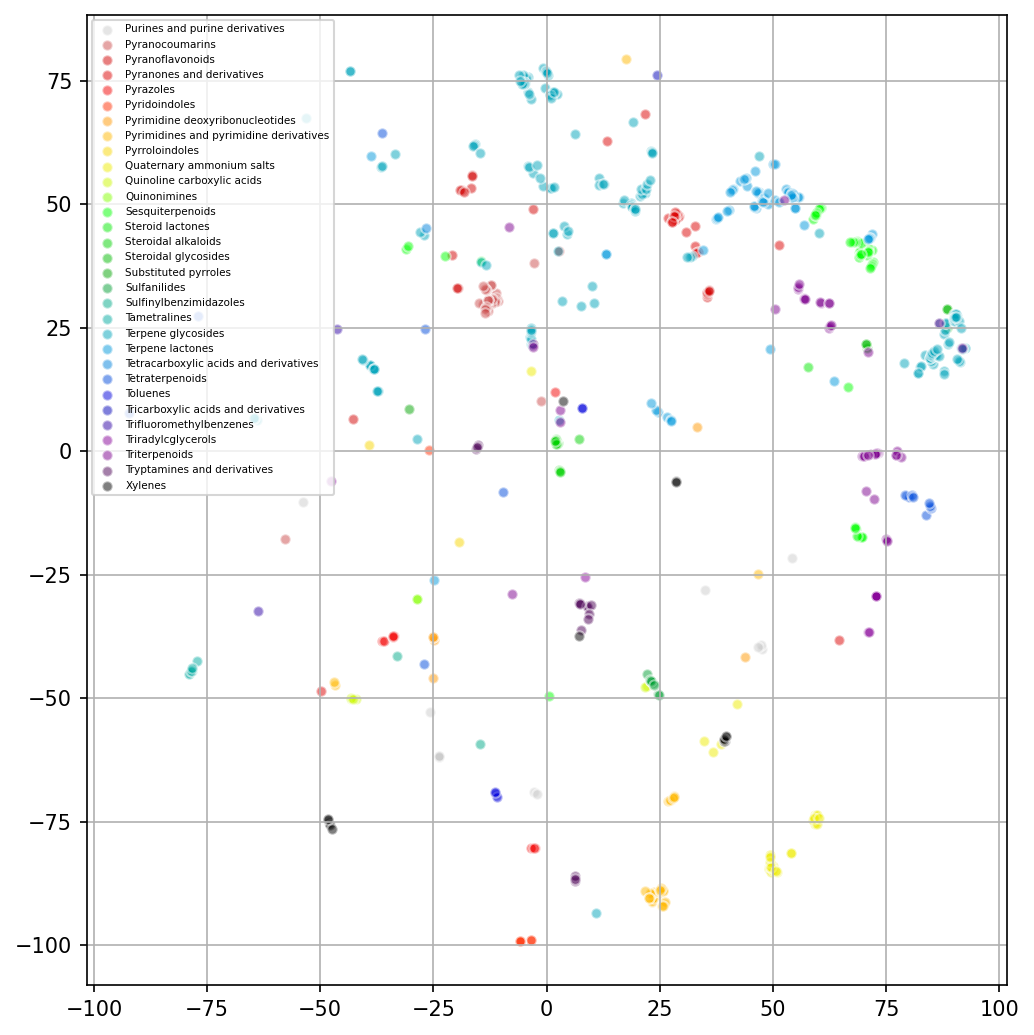

In [43]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral_r") #"turbo") #"nipy_spectral") #'inferno')

max_number_of_classes = 30
N = min(np.unique(labels_test_subclass_str).shape[0], max_number_of_classes)

fig, ax = plt.subplots(figsize=(7, 7), dpi=150)
for i, label in enumerate(np.unique(labels_test_subclass_str)[-(max_number_of_classes+1):]):
    idx = np.where(np.array(labels_test_subclass_str) == label)[0]
    scale = 25
    ax.scatter(X_2d[idx,1], X_2d[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.5, edgecolors='white')

ax.legend(fontsize=5, frameon=True, facecolor="white")
ax.grid(True)
plt.tight_layout()

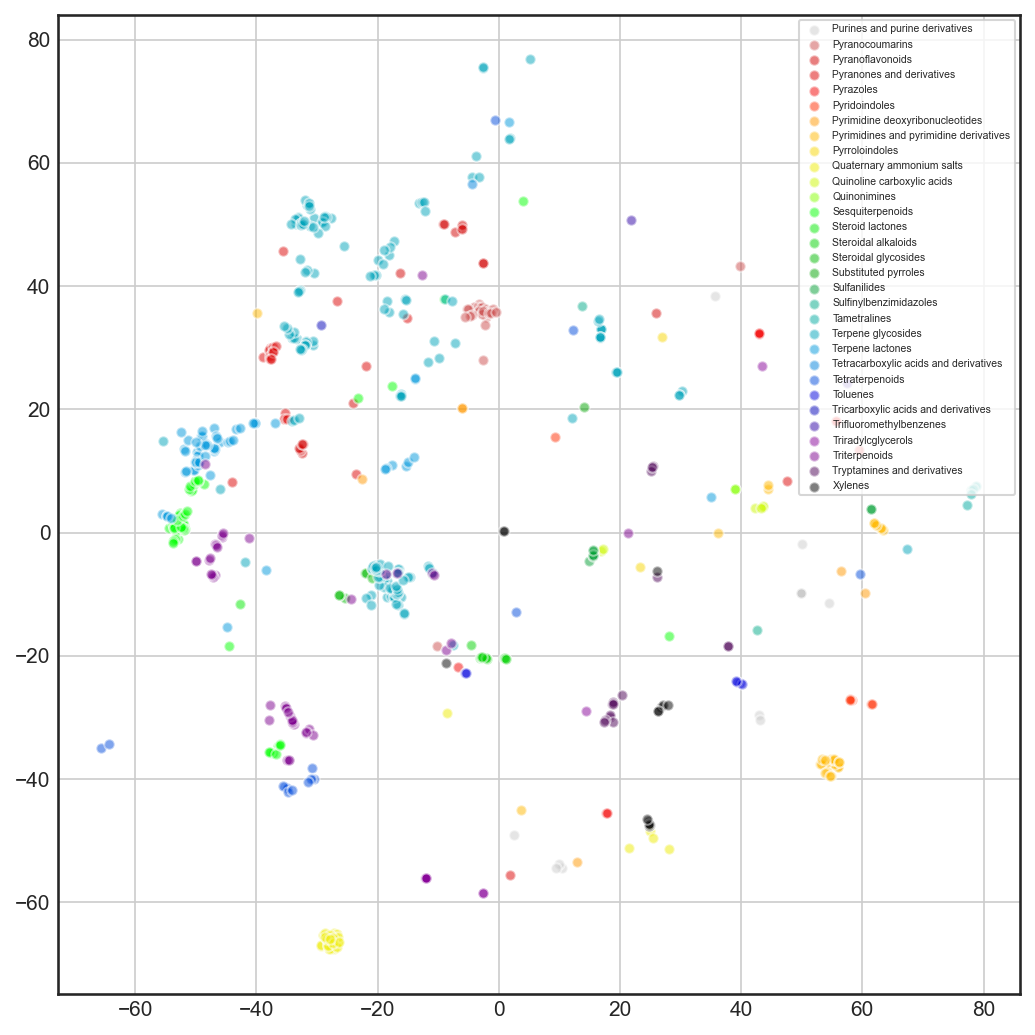

In [86]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral_r") #"turbo") #"nipy_spectral") #'inferno')

max_number_of_classes = 30
N = min(np.unique(labels_test_subclass_str).shape[0], max_number_of_classes)

fig, ax = plt.subplots(figsize=(7, 7), dpi=150)
for i, label in enumerate(np.unique(labels_test_subclass_str)[-(max_number_of_classes+1):]):
    idx = np.where(np.array(labels_test_subclass_str) == label)[0]
    scale = 25
    ax.scatter(X_2d[idx,1], X_2d[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.5, edgecolors='white')

ax.legend(fontsize=5, frameon=True, facecolor="white")
ax.grid(True)
plt.tight_layout()

## Compare to modified cosine based distances

In [37]:
num_of_peaks = np.array([len(s.peaks) for s in spectrums_test])
print(num_of_peaks.max(), num_of_peaks.min())

1000 3


In [39]:
num_of_peaks.mean()

143.21438489308525

# Compute similarity matrix (can take very long, modified cosine is slow!)

In [40]:
from matchms.similarity import ModifiedCosine

similarity_modcos = ModifiedCosine(tolerance=0.005)
scores_modcos = calculate_scores(spectrums_test, spectrums_test,
                                 similarity_modcos,
                                 is_symmetric=True)

In [42]:
# since computation is slow, pickle scores object for re-runs
"""
import pickle 

file_modcos_scores = open('scores_modcos_spectrums_test.obj', 'wb') 
pickle.dump(scores_modcos, file_modcos_scores)
"""

In [44]:
np.max(scores_modcos.scores["score"]), np.min(scores_modcos.scores["score"])

(1.0000000000000495, 0.0)

In [48]:
distances_modcos = np.max(scores_modcos.scores["score"]) - scores_modcos.scores["score"]
distances_modcos = distances_modcos/distances_modcos.max()
print(distances_modcos.max(), distances_modcos.min())

1.0 0.0


In [49]:
distances_modcos[:5,:5]

array([[4.97379915e-14, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 4.88498131e-14, 9.88763881e-01, 1.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 9.88763881e-01, 5.00710584e-14, 1.00000000e+00,
        9.99987103e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.95159469e-14,
        9.99976379e-01],
       [1.00000000e+00, 1.00000000e+00, 9.99987103e-01, 9.99976379e-01,
        5.08482145e-14]])

In [50]:
scores_modcos.scores["score"][:5,:5]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.12361188e-02, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.12361188e-02, 1.00000000e+00, 0.00000000e+00,
        1.28972896e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        2.36210428e-05],
       [0.00000000e+00, 0.00000000e+00, 1.28972896e-05, 2.36210428e-05,
        1.00000000e+00]])

## Compute t-SNE plot based on distance matrix

In [52]:
tsne_modcos = TSNE(n_components=2, metric="precomputed", square_distances=True, random_state=0)
X_2d_modcos = tsne_modcos.fit_transform(distances_modcos)

Text(0.5, 1.0, 'TSNE (modified Cosine) - Classyfire classes')

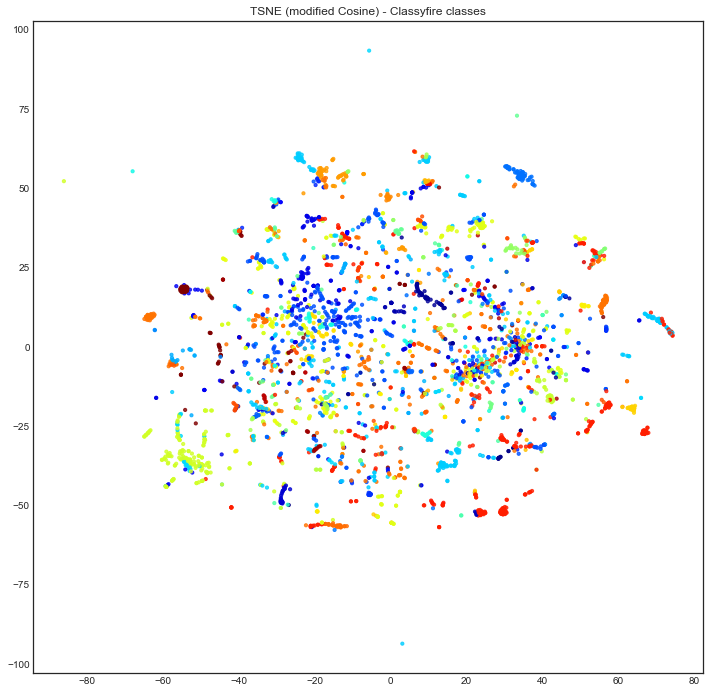

In [54]:
plt.figure(figsize=(12,12))
plt.style.use('seaborn-white')
plt.scatter(X_2d_modcos[:,0], X_2d_modcos[:,1],
            c=labels_test, s=10, cmap="jet_r", alpha=0.8)
#plt.colorbar()
plt.title("TSNE (modified Cosine) - Classyfire classes")

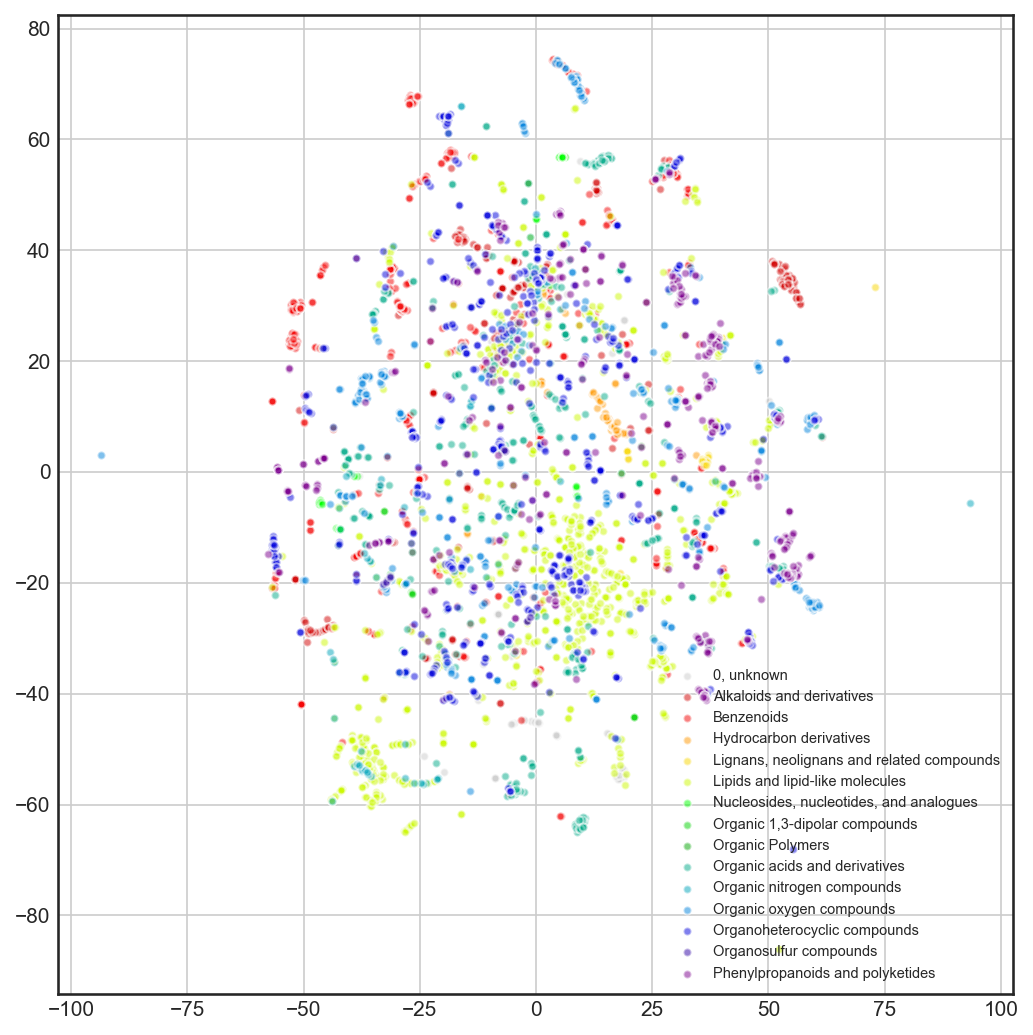

In [58]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral_r") #"turbo") #"nipy_spectral") #'inferno')

N = np.unique(labels_test_superclass_str).shape[0]

fig, ax = plt.subplots(figsize=(7, 7), dpi=150)
for i, label in enumerate(np.unique(labels_test_superclass_str)):
    idx = np.where(np.array(labels_test_superclass_str) == label)[0]
    scale = 15
    ax.scatter(X_2d_modcos[idx,1], X_2d_modcos[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.5, edgecolors='white')

ax.legend(fontsize=7)
ax.grid(True)
plt.tight_layout()
plt.savefig("TSNE_modcos_scores_default_settings.svg")

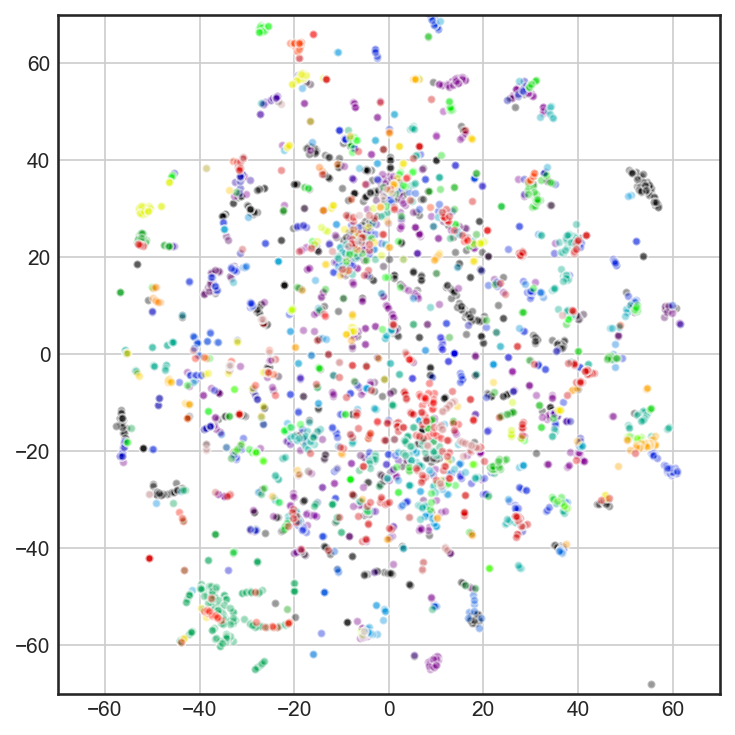

In [73]:
x_low = -70
x_high = 70
y_low = -70
y_high = 70

idx_zoom = np.where((X_2d_modcos[:,1] > x_low) & (X_2d_modcos[:,1] < x_high) & (X_2d_modcos[:,0] > y_low) & (X_2d_modcos[:,0] < y_high))[0]
idx_zoom.shape

cmap = matplotlib.cm.get_cmap("nipy_spectral") #"turbo") #"nipy_spectral") #'inferno')

selected_labels = [labels_test_subclass_str[i] for i in idx_zoom]
N = np.unique(selected_labels).shape[0]

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
for i, label in enumerate(np.unique(selected_labels)):
    idx = np.where(np.array(labels_test_subclass_str) == label)[0]
    scale = 15
    ax.scatter(X_2d_modcos[idx,1], X_2d_modcos[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.4, edgecolors='white')

#ax.legend(fontsize=5, frameon=True, facecolor="white")
ax.grid(True)
plt.xlim((x_low, x_high))
plt.ylim((y_low, y_high))
plt.tight_layout()

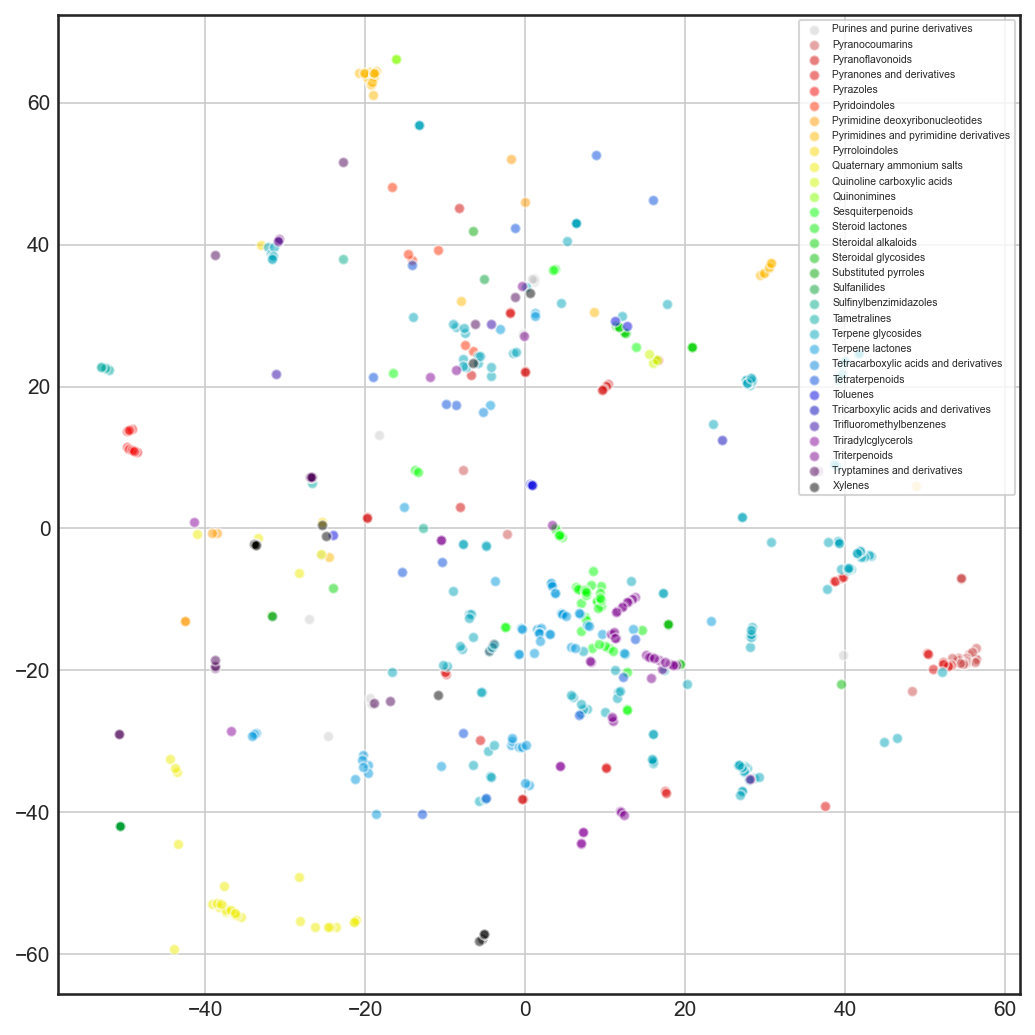

In [85]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral_r") #"turbo") #"nipy_spectral") #'inferno')

max_number_of_classes = 30
N = min(np.unique(labels_test_subclass_str).shape[0], max_number_of_classes)

fig, ax = plt.subplots(figsize=(7, 7), dpi=150)
for i, label in enumerate(np.unique(labels_test_subclass_str)[-(max_number_of_classes+1):]):
    idx = np.where(np.array(labels_test_subclass_str) == label)[0]
    scale = 25
    ax.scatter(X_2d_modcos[idx,1], X_2d_modcos[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.5, edgecolors='white')

ax.legend(fontsize=5, frameon=True, facecolor="white")
ax.grid(True)
plt.tight_layout()

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [17]:
X_2d = tsne.fit_transform(embeddings)

In [137]:
labels_test_reduced = [x if labels_test.count(x) > 5 else -1 for x in labels_test]
labels_test_reduced = label_encoder.fit_transform(labels_test_reduced)

In [149]:
np.unique(labels_test).shape

(99,)

Text(0.5, 1.0, 'TSNE - Classyfire classes')

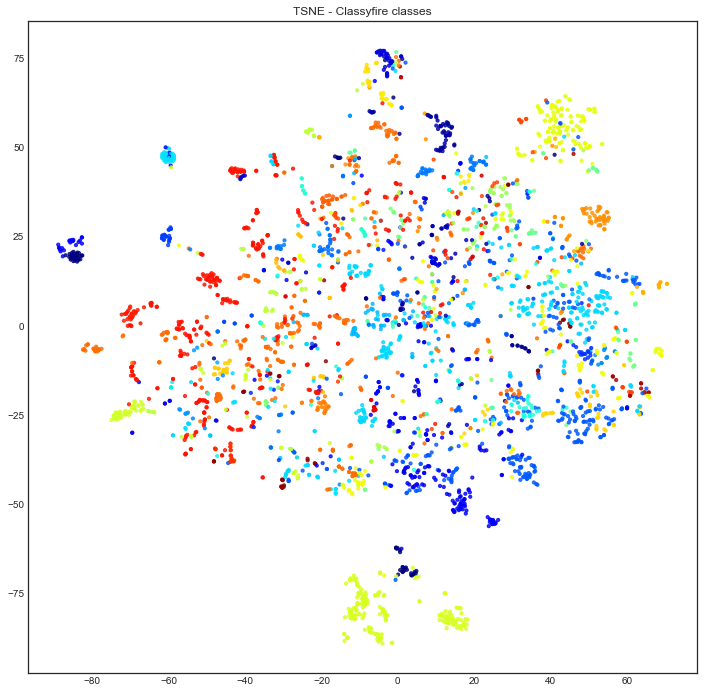

In [146]:
plt.figure(figsize=(12,12))
plt.style.use('seaborn-white')
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_test, s=10, cmap="jet_r", alpha=0.8)
#plt.colorbar()
plt.title("TSNE - Classyfire classes")

(array([ 25.,  14.,   1.,  17.,   1.,   2.,   1.,   3.,  12.,  10., 372.,
         29.,  20.,   2.,  49.,   9.,   2.,  24., 342.,   1.,  23.,   2.,
         76.,   2.,  16.,   8.,  17.,  31.,  43.,  17.,  19.,   2., 117.,
        179., 180.,  62.,  14.,  40.,  18.,  13.,   1.,  38.,   1.,  14.,
          6.,  28.,  13.,  16.,   5.,  12.,   1.,   8.,   2.,   1.,  16.,
         32.,  21.,   4.,  51., 352.,   4.,   1.,  54.,   3.,   1.,  11.,
         16.,  66.,  37.,   1., 390.,   1.,   9.,  25.,  21.,   5.,   6.,
          1.,  26.,  26., 219.,   2.,  46.,   3.,  12.,  18.,   6.,  62.,
         15.,  77.]),
 array([ 0.        ,  1.08888889,  2.17777778,  3.26666667,  4.35555556,
         5.44444444,  6.53333333,  7.62222222,  8.71111111,  9.8       ,
        10.88888889, 11.97777778, 13.06666667, 14.15555556, 15.24444444,
        16.33333333, 17.42222222, 18.51111111, 19.6       , 20.68888889,
        21.77777778, 22.86666667, 23.95555556, 25.04444444, 26.13333333,
        27.22222222, 

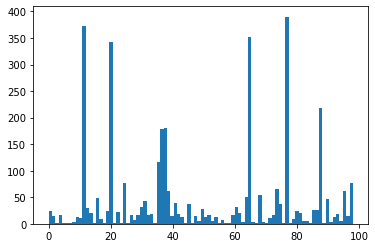

In [131]:
plt.hist(labels_test, 90)

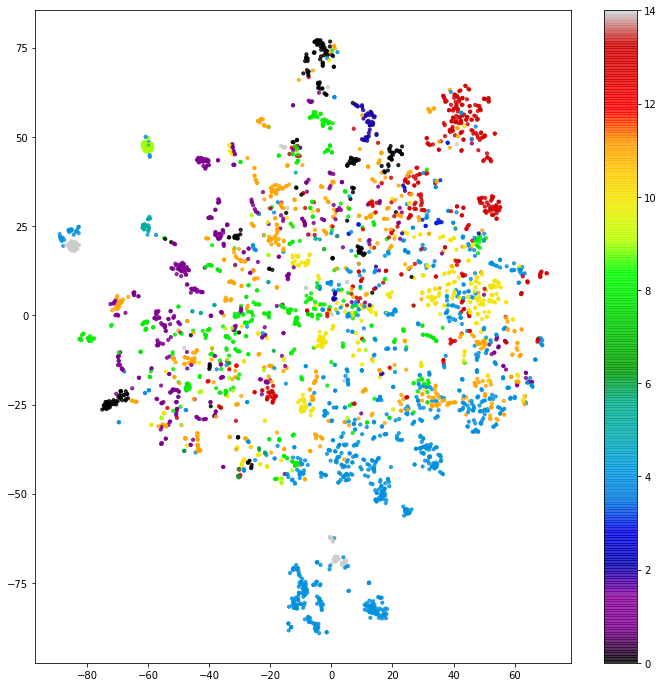

In [141]:
plt.figure(figsize=(12,12))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_test_superclass, s=10, cmap="nipy_spectral", alpha=0.8)
plt.colorbar()

In [155]:
np.unique(labels_test_subclass).shape

(140,)

Text(0.5, 1.0, 'TSNE - Classyfire subclasses')

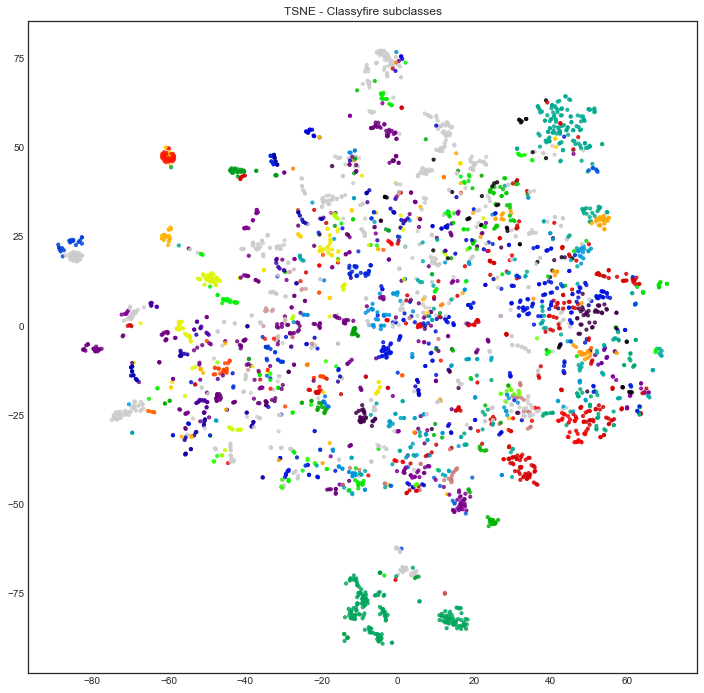

In [156]:
plt.figure(figsize=(12,12))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_test_subclass, s=10, cmap="nipy_spectral", alpha=0.8)
#plt.colorbar()
plt.title("TSNE - Classyfire subclasses")

# Run TSNE (different parameters)

In [26]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, metric='cosine', perplexity=20, random_state=0)

X_2d_cosine = tsne2.fit_transform(embeddings)

c:\users\florianhuber\anaconda3\envs\ms2deepscore\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [19]:
parent_masses = [float(x.get("parent_mass")) for x in spectrums_test] 
parent_masses[:10]

[543.992724,
 322.250724,
 322.250782,
 1021.722724,
 1021.766842,
 1021.710782,
 196.121724,
 196.121724,
 196.121724,
 196.121724]

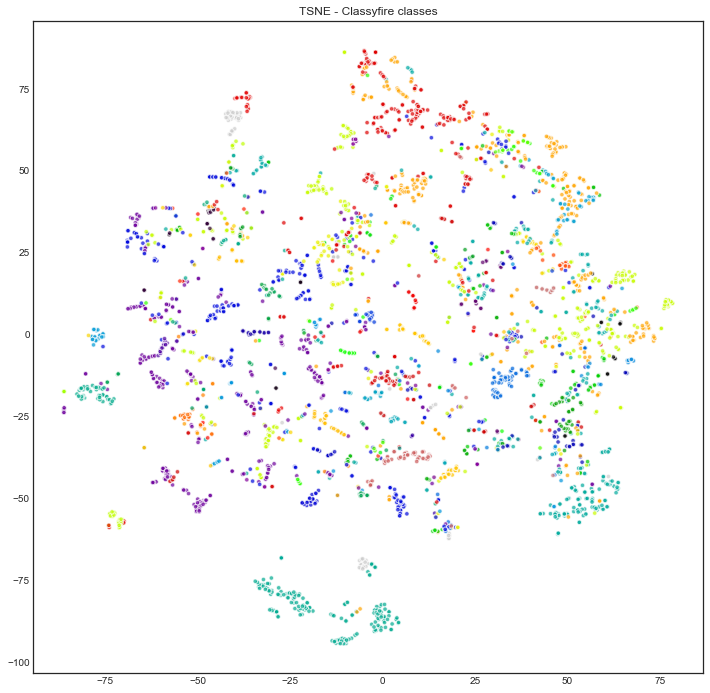

In [83]:
plt.figure(figsize=(12,12))
plt.style.use('seaborn-white')
plt.scatter(X_2d_cosine[:,0], X_2d_cosine[:,1], c=labels_test, edgecolors="white", s=20, cmap="nipy_spectral", alpha=0.7) #s=np.array(parent_masses)/30, )
#plt.colorbar()
plt.title("TSNE - Classyfire classes")
plt.savefig(os.path.join(path_data, "TSNE_testset_20210326-191145_Test_10k_500_500_200_classes.pdf"))

Text(0.5, 1.0, 'TSNE - Classyfire classes')

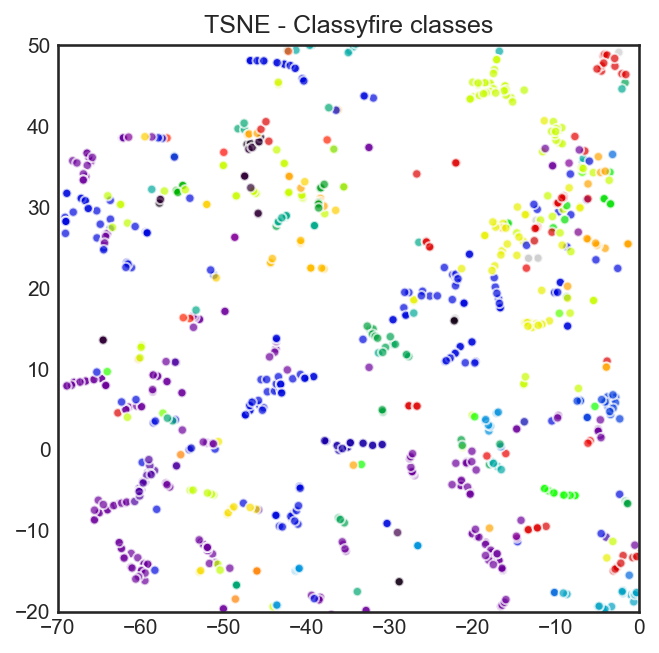

In [84]:
plt.figure(figsize=(5, 5), dpi=150)
plt.style.use('seaborn-white')
plt.scatter(X_2d_cosine[:,0], X_2d_cosine[:,1], c=labels_test, edgecolors="white", s=20, cmap="nipy_spectral", alpha=0.7) #s=np.array(parent_masses)/30, )
plt.xlim((-70, 0))
plt.ylim((-20, 50))
plt.title("TSNE - Classyfire classes")

In [21]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, metric='cosine', perplexity=50, random_state=0)

X_2d_2 = tsne2.fit_transform(embeddings)

c:\users\florianhuber\anaconda3\envs\ms2deepscore\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


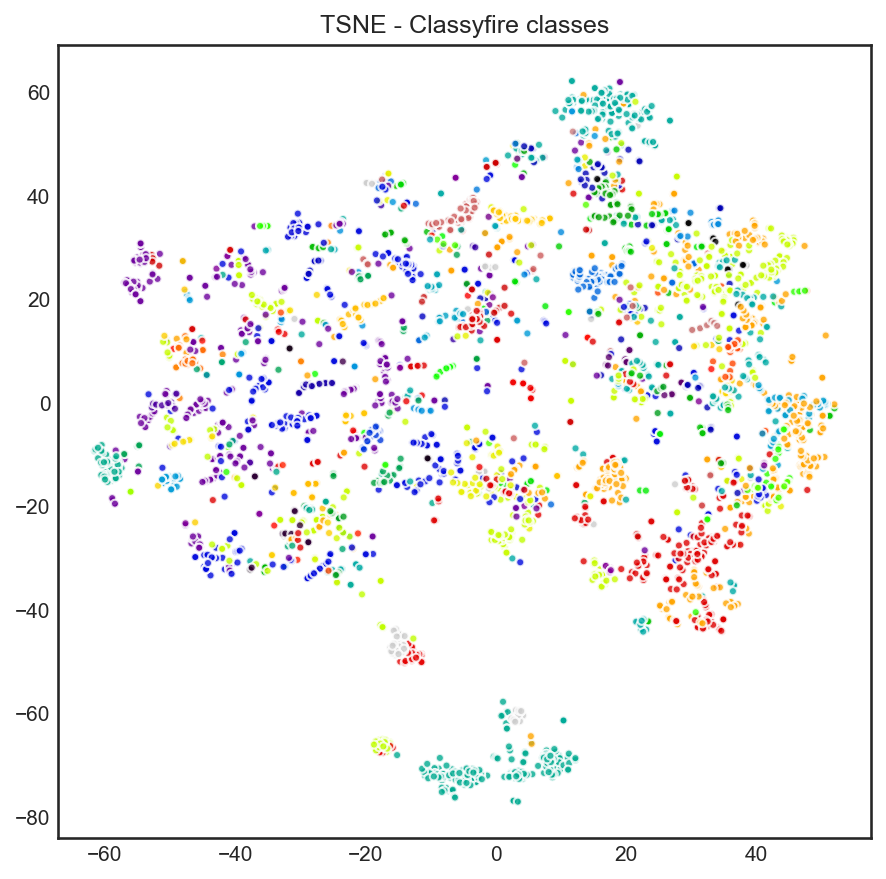

In [80]:
plt.figure(figsize=(7, 7), dpi=150)
plt.style.use('seaborn-white')
plt.scatter(X_2d_2[:,1], X_2d_2[:,0], c=labels_test, edgecolors="white", s=15, cmap="nipy_spectral", alpha=0.8) #s=np.array(parent_masses)/30, )
#plt.colorbar()
plt.title("TSNE - Classyfire classes")
plt.savefig(os.path.join(path_data, "TSNE_testset_20210326-191145_Test_10k_500_500_200_classes_perplexity50.pdf"))

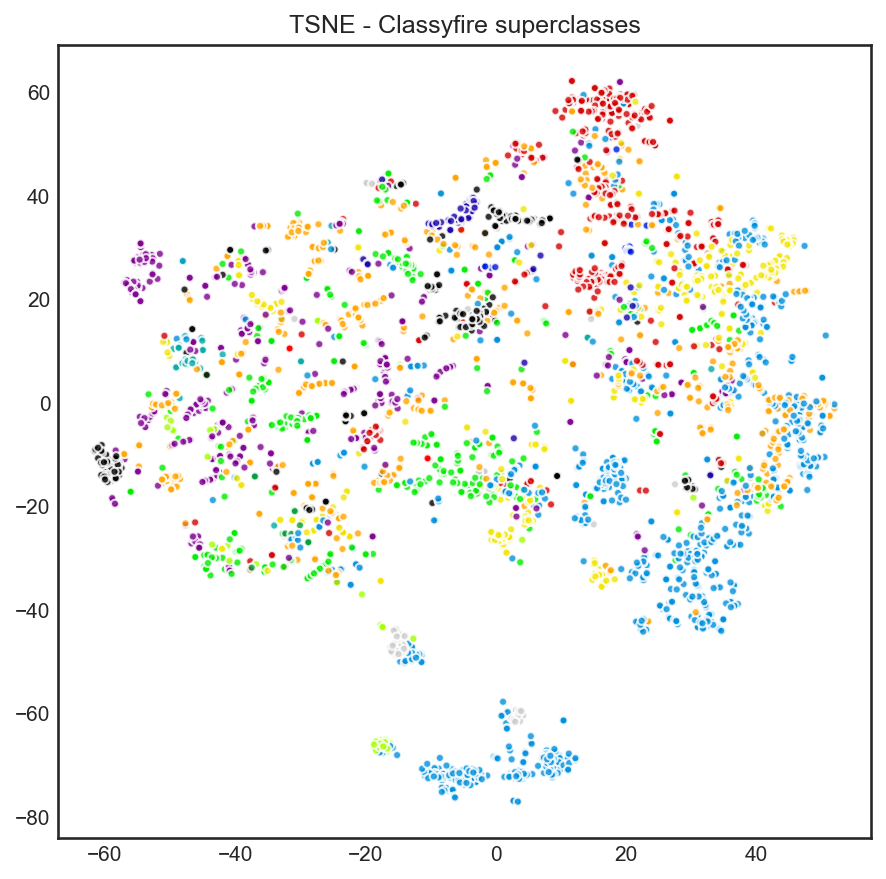

In [91]:
plt.figure(figsize=(7, 7), dpi=150)
plt.style.use('seaborn-white')
plt.scatter(X_2d_2[:,1], X_2d_2[:,0], c=labels_test_superclass, edgecolors="white", s=15, cmap="nipy_spectral", alpha=0.8) #s=np.array(parent_masses)/30, )
#plt.colorbar()
plt.title("TSNE - Classyfire superclasses")
plt.savefig(os.path.join(path_data, "TSNE_testset_20210326-191145_Test_10k_500_500_200_superclasses_perplexity50.pdf"))

Text(0.5, 1.0, 'TSNE - Classyfire classes')

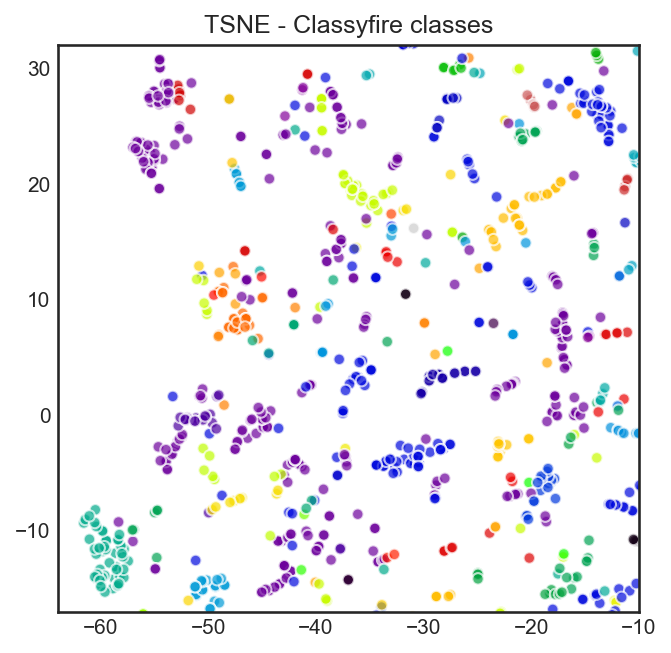

In [81]:
plt.figure(figsize=(5,5), dpi=150)
plt.style.use('seaborn-white')
plt.scatter(X_2d_2[:,1], X_2d_2[:,0], c=labels_test, edgecolors="white", s=30, cmap="nipy_spectral", alpha=0.7) #s=np.array(parent_masses)/30, )
plt.xlim((-64, -10))
plt.ylim((-17, 32))
#plt.colorbar()
plt.title("TSNE - Classyfire classes")

Text(0.5, 1.0, 'TSNE - Classyfire classes')

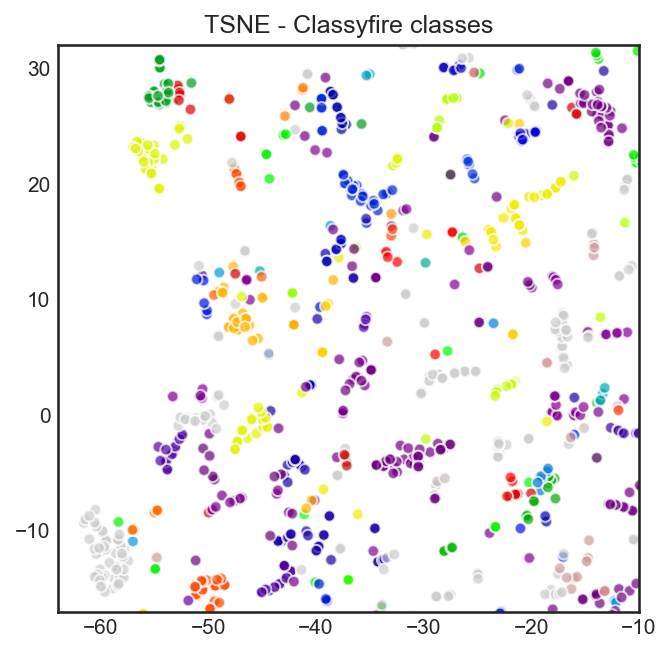

In [82]:
plt.figure(figsize=(5,5), dpi=150)
plt.style.use('seaborn-white')
plt.scatter(X_2d_2[:,1], X_2d_2[:,0], c=labels_test_subclass, edgecolors="white", s=30, cmap="nipy_spectral", alpha=0.7) #s=np.array(parent_masses)/30, )
plt.xlim((-64, -10))
plt.ylim((-17, 32))
#plt.colorbar()
plt.title("TSNE - Classyfire classes")

In [85]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, metric='cosine', perplexity=100, random_state=0)

X_2d_cosine100 = tsne2.fit_transform(embeddings)

c:\users\florianhuber\anaconda3\envs\ms2deepscore\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


Text(0.5, 1.0, 'TSNE - Classyfire classes')

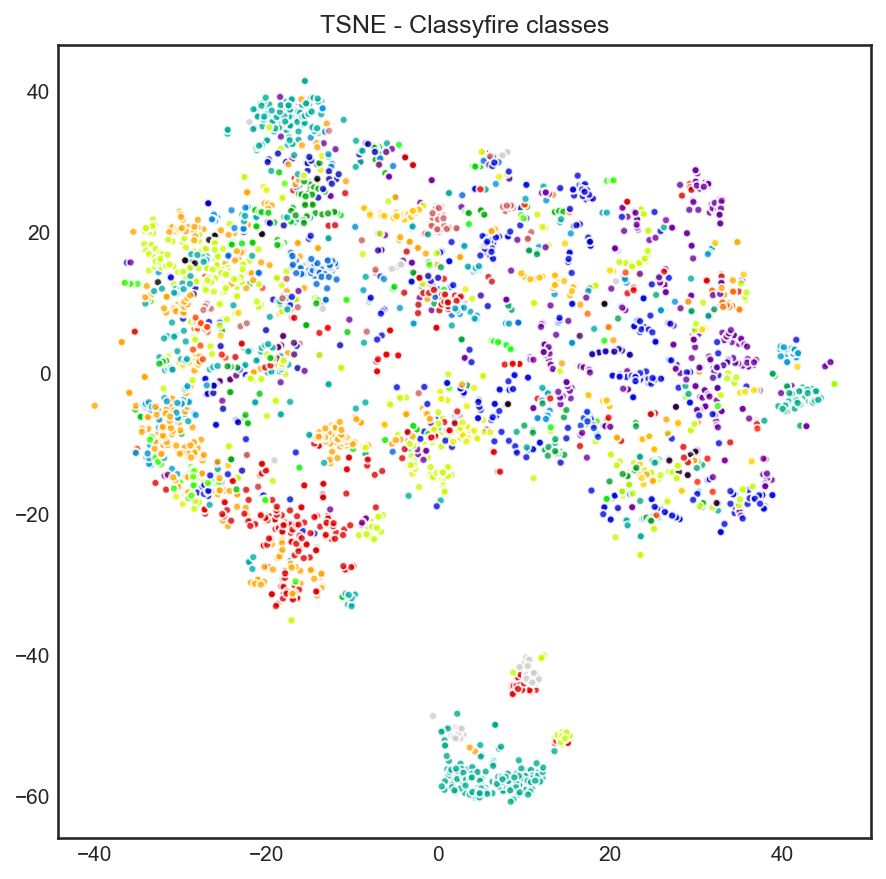

In [86]:
plt.figure(figsize=(7, 7), dpi=150)
plt.style.use('seaborn-white')
plt.scatter(X_2d_cosine100[:,1], X_2d_cosine100[:,0], c=labels_test, edgecolors="white", s=15, cmap="nipy_spectral", alpha=0.8) #s=np.array(parent_masses)/30, )
#plt.colorbar()
plt.title("TSNE - Classyfire classes")
#plt.savefig(os.path.join(path_data, "TSNE_testset_20210326-191145_Test_10k_500_500_200_classes_perplexity100.pdf"))

Text(0.5, 1.0, 'TSNE - Classyfire subclasses')

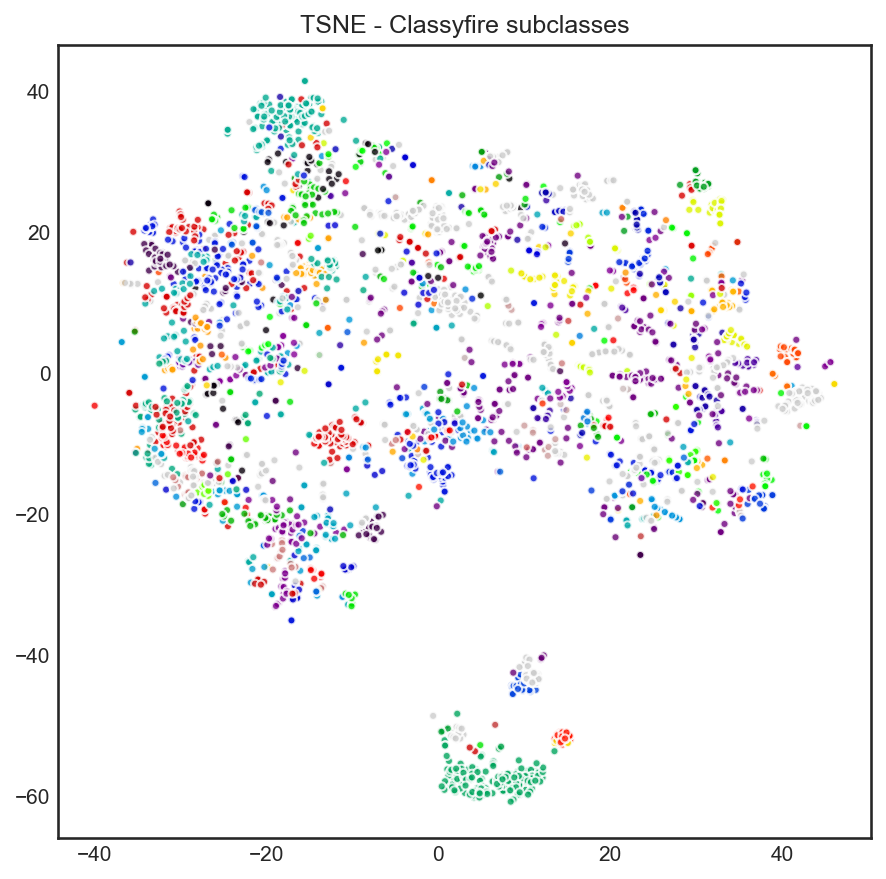

In [88]:
plt.figure(figsize=(7, 7), dpi=150)
plt.style.use('seaborn-white')
plt.scatter(X_2d_cosine100[:,1], X_2d_cosine100[:,0], c=labels_test_subclass, edgecolors="white", s=15, cmap="nipy_spectral", alpha=0.8) #s=np.array(parent_masses)/30, )
#plt.colorbar()
plt.title("TSNE - Classyfire subclasses")

In [120]:
labels_test_superclass[:10]

[0.36993979150164014,
 0.3108635294029115,
 0.3108635294029115,
 0.9291374834813948,
 0.9291374834813948,
 0.9291374834813948,
 0.7791679294740227,
 0.7791679294740227,
 0.7791679294740227,
 0.7791679294740227]

In [133]:
labels_test_superclass_str

['Organoheterocyclic compounds',
 'Lipids and lipid-like molecules',
 'Lipids and lipid-like molecules',
 'Organic acids and derivatives',
 'Organic acids and derivatives',
 'Organic acids and derivatives',
 'Organic acids and derivatives',
 'Organic acids and derivatives',
 'Organic acids and derivatives',
 'Organic acids and derivatives',
 'Organic acids and derivatives',
 'Lipids and lipid-like molecules',
 'Lipids and lipid-like molecules',
 'Organoheterocyclic compounds',
 'Organic acids and derivatives',
 'Organic acids and derivatives',
 'Organic acids and derivatives',
 'Organoheterocyclic compounds',
 'Phenylpropanoids and polyketides',
 'Organoheterocyclic compounds',
 'Organoheterocyclic compounds',
 'Organic oxygen compounds',
 'Organic oxygen compounds',
 'Organic oxygen compounds',
 'Organic oxygen compounds',
 'Alkaloids and derivatives',
 'Alkaloids and derivatives',
 'Organoheterocyclic compounds',
 'Organoheterocyclic compounds',
 'Phenylpropanoids and polyketides',
 

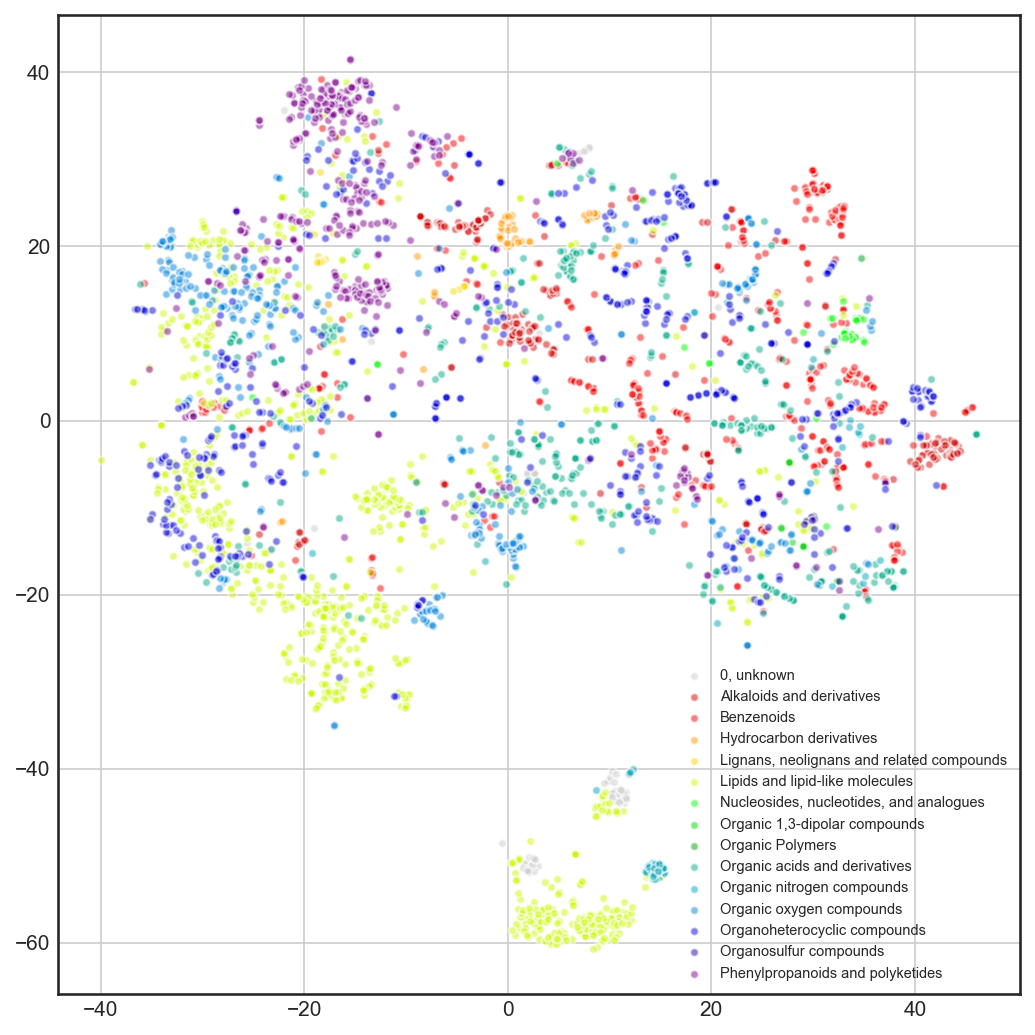

In [178]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral_r") #"turbo") #"nipy_spectral") #'inferno')

N = np.unique(labels_test_superclass_str).shape[0]

fig, ax = plt.subplots(figsize=(7, 7), dpi=150)
for i, label in enumerate(np.unique(labels_test_superclass_str)):
    idx = np.where(np.array(labels_test_superclass_str) == label)[0]
    scale = 15
    ax.scatter(X_2d_cosine100[idx,1], X_2d_cosine100[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.5, edgecolors='white')

ax.legend(fontsize=7)
ax.grid(True)
plt.tight_layout()
plt.savefig("TSNE_testset_20210326-191145_Test_10k_500_500_200_classes_perplexity100.svg")

In [233]:
idx_zoom = np.where((X_2d_cosine100[:,1] > 20) & (X_2d_cosine100[:,1] < 35) & (X_2d_cosine100[:,0] > 15) & (X_2d_cosine100[:,0] < 30))[0]
idx_zoom.shape

(150,)

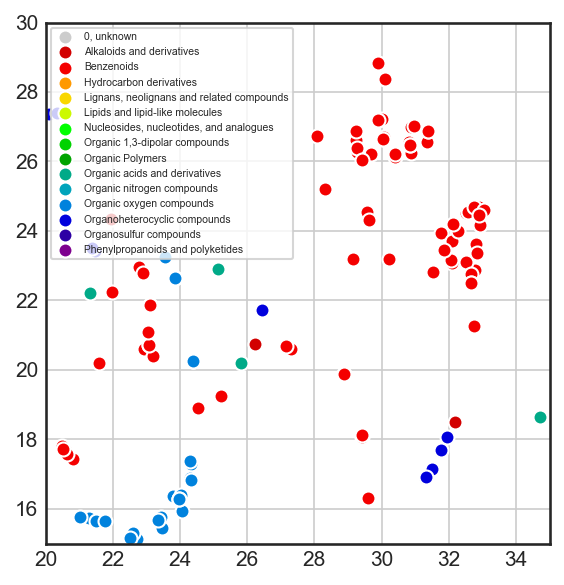

In [261]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral_r") #"turbo") #"nipy_spectral") #'inferno')

N = np.unique(labels_test_superclass_str).shape[0]

fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
for i, label in enumerate(np.unique(labels_test_superclass_str)):
    idx = np.where(np.array(labels_test_superclass_str) == label)[0]
    scale = 45
    ax.scatter(X_2d_cosine100[idx,1], X_2d_cosine100[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=1, edgecolors='white')

ax.legend(fontsize=5, frameon=True, facecolor="white")
ax.grid(True)
plt.xlim((20, 35))
plt.ylim((15, 30))
plt.tight_layout()
plt.savefig("TSNE_testset_20210326-191145_Test_10k_500_500_200_superclasses_perplexity100_zoom.svg")

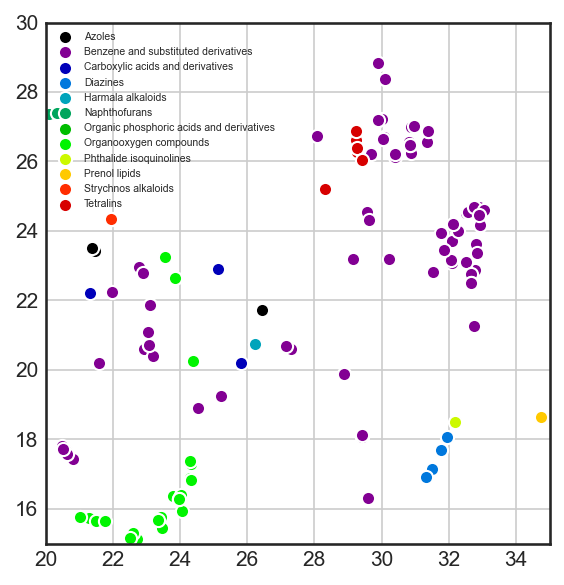

In [256]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral") #"turbo") #"nipy_spectral") #'inferno')

selected_labels = [labels_test_class_str[i] for i in idx_zoom]
N = np.unique(selected_labels).shape[0]

fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
for i, label in enumerate(np.unique(selected_labels)):
    idx = np.where(np.array(labels_test_class_str) == label)[0]
    scale = 40
    ax.scatter(X_2d_cosine100[idx,1], X_2d_cosine100[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=1, edgecolors='white')

ax.legend(fontsize=5)
ax.grid(True)
plt.xlim((20, 35))
plt.ylim((15, 30))
plt.tight_layout()
#plt.savefig("TSNE_testset_20210326-191145_Test_10k_500_500_200_classes_perplexity100.svg")

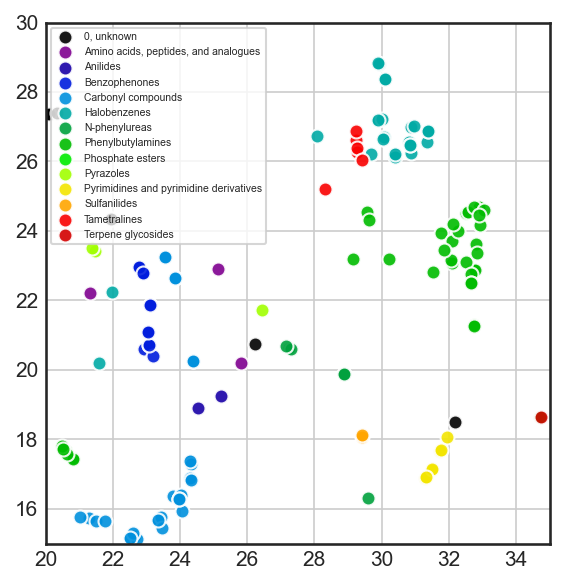

In [262]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral") #"turbo") #"nipy_spectral") #'inferno')

selected_labels = [labels_test_subclass_str[i] for i in idx_zoom]
N = np.unique(selected_labels).shape[0]

fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
for i, label in enumerate(np.unique(selected_labels)):
    idx = np.where(np.array(labels_test_subclass_str) == label)[0]
    scale = 45
    ax.scatter(X_2d_cosine100[idx,1], X_2d_cosine100[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.9, edgecolors='white')

ax.legend(fontsize=5, frameon=True, facecolor="white")
ax.grid(True)
plt.xlim((20, 35))
plt.ylim((15, 30))
plt.tight_layout()
plt.savefig("TSNE_testset_20210326-191145_Test_10k_500_500_200_subclasses_perplexity100_zoom.svg")
plt.savefig("TSNE_testset_20210326-191145_Test_10k_500_500_200_subclasses_perplexity100_zoom.pdf")

Text(0.5, 1.0, 'TSNE - Classyfire classes')

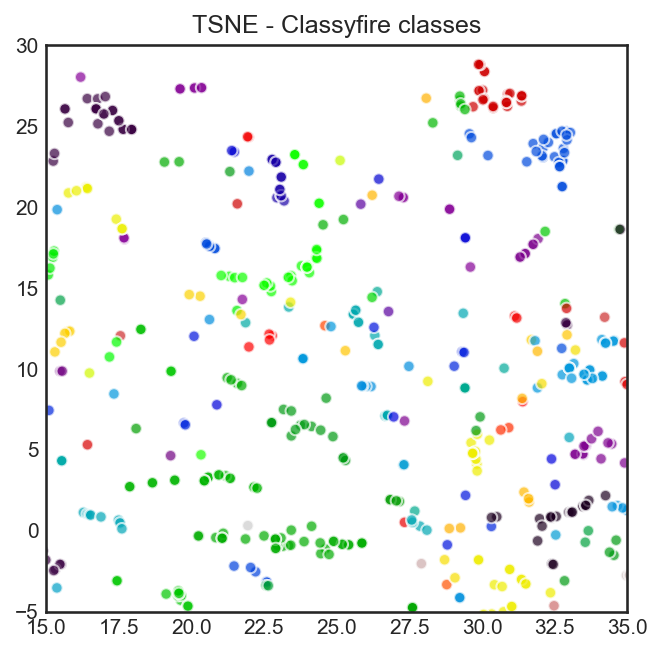

In [199]:
plt.figure(figsize=(5,5), dpi=150)
plt.style.use('seaborn-white')
plt.scatter(X_2d_cosine100[:,1], X_2d_cosine100[:,0], c=labels_test_subclass, edgecolors="white", s=30, cmap="nipy_spectral", alpha=0.7) #s=np.array(parent_masses)/30, )
plt.xlim((15, 35))
plt.ylim((-5, 30))
#plt.colorbar()
plt.title("TSNE - Classyfire classes")

In [ ]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral_r") #"turbo") #"nipy_spectral") #'inferno')

N = np.unique(labels_test_class_str).shape[0]

fig, ax = plt.subplots(figsize=(7, 7), dpi=150)
for i, label in enumerate(np.unique(labels_test_class_str)):
    idx = np.where(np.array(labels_test_class_str) == label)[0]
    scale = 15
    ax.scatter(X_2d_cosine100[idx,1], X_2d_cosine100[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.5, edgecolors='white')

ax.legend(fontsize=7)
ax.grid(True)
plt.tight_layout()

<ipython-input-192-c470b82a2cea>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


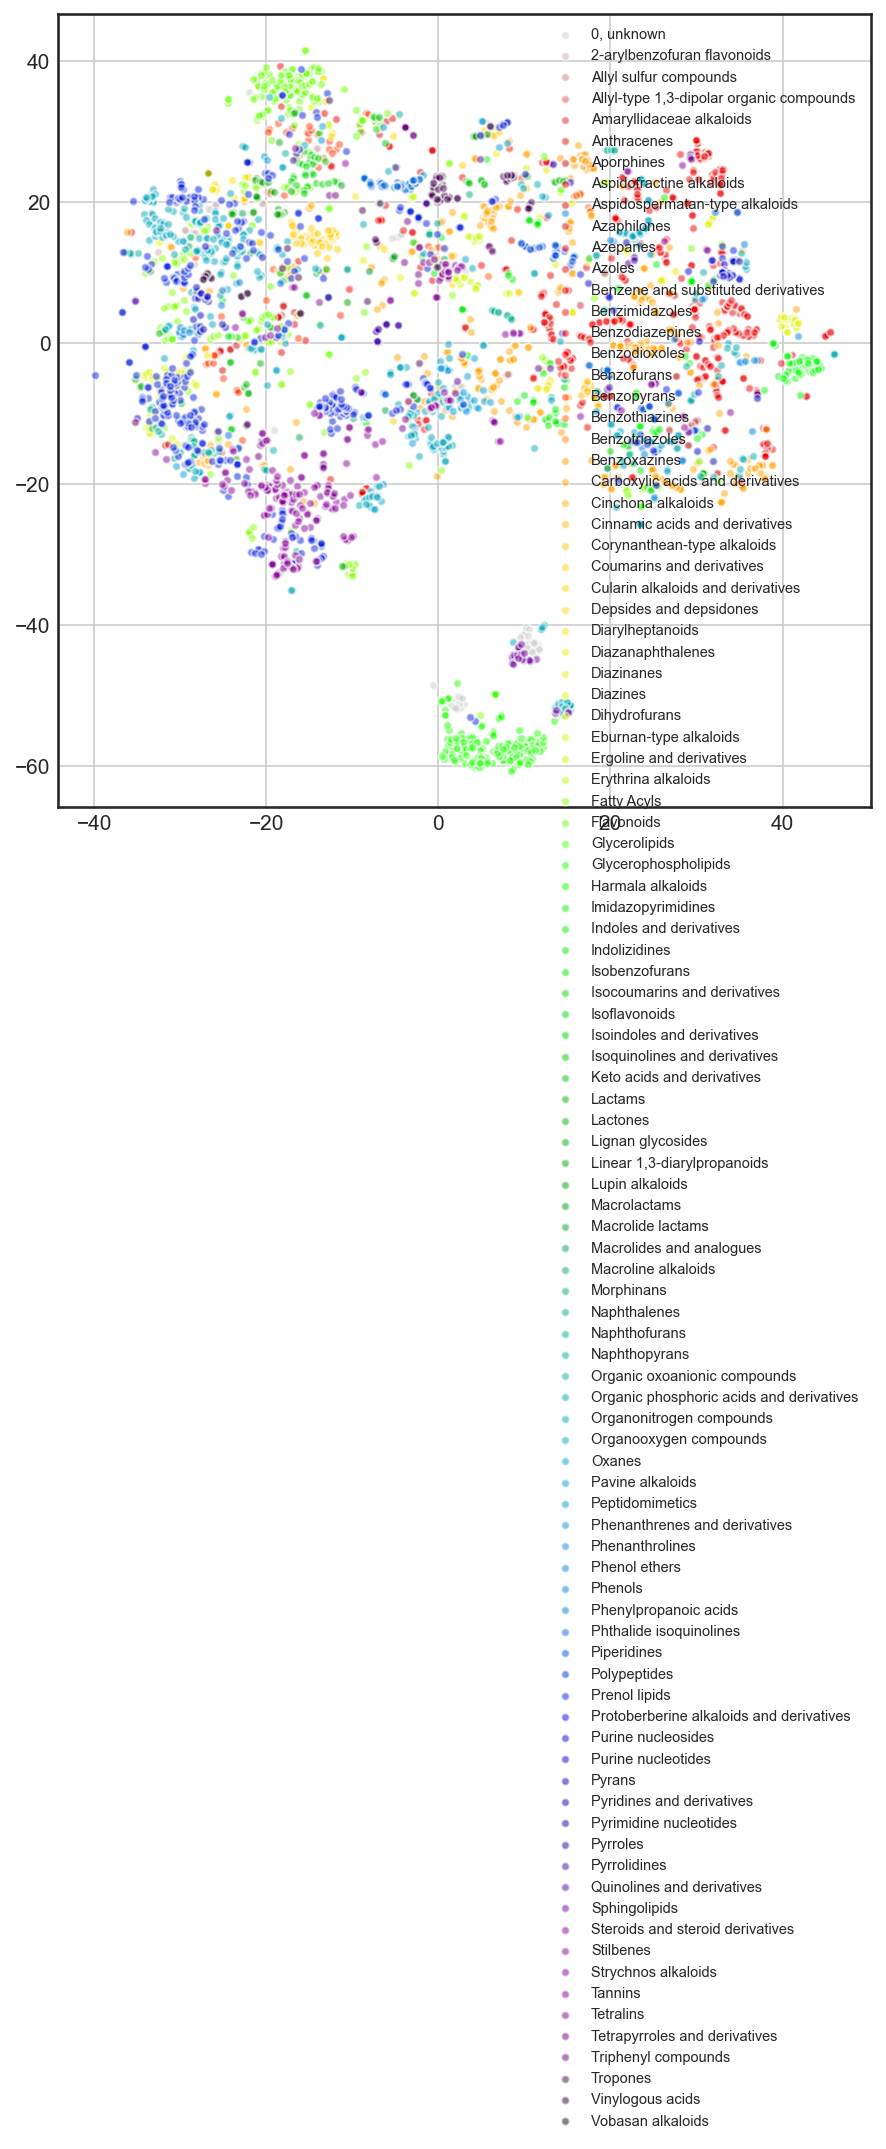

In [192]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral_r") #"turbo") #"nipy_spectral") #'inferno')

N = np.unique(labels_test_class_str).shape[0]

fig, ax = plt.subplots(figsize=(7, 7), dpi=150)
for i, label in enumerate(np.unique(labels_test_class_str)):
    idx = np.where(np.array(labels_test_class_str) == label)[0]
    scale = 15
    ax.scatter(X_2d_cosine100[idx,1], X_2d_cosine100[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.5, edgecolors='white')

ax.legend(fontsize=7)
ax.grid(True)
plt.tight_layout()
#plt.savefig("TSNE_testset_20210326-191145_Test_10k_500_500_200_classes_perplexity100.svg")

<ipython-input-189-b2e870b87d57>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


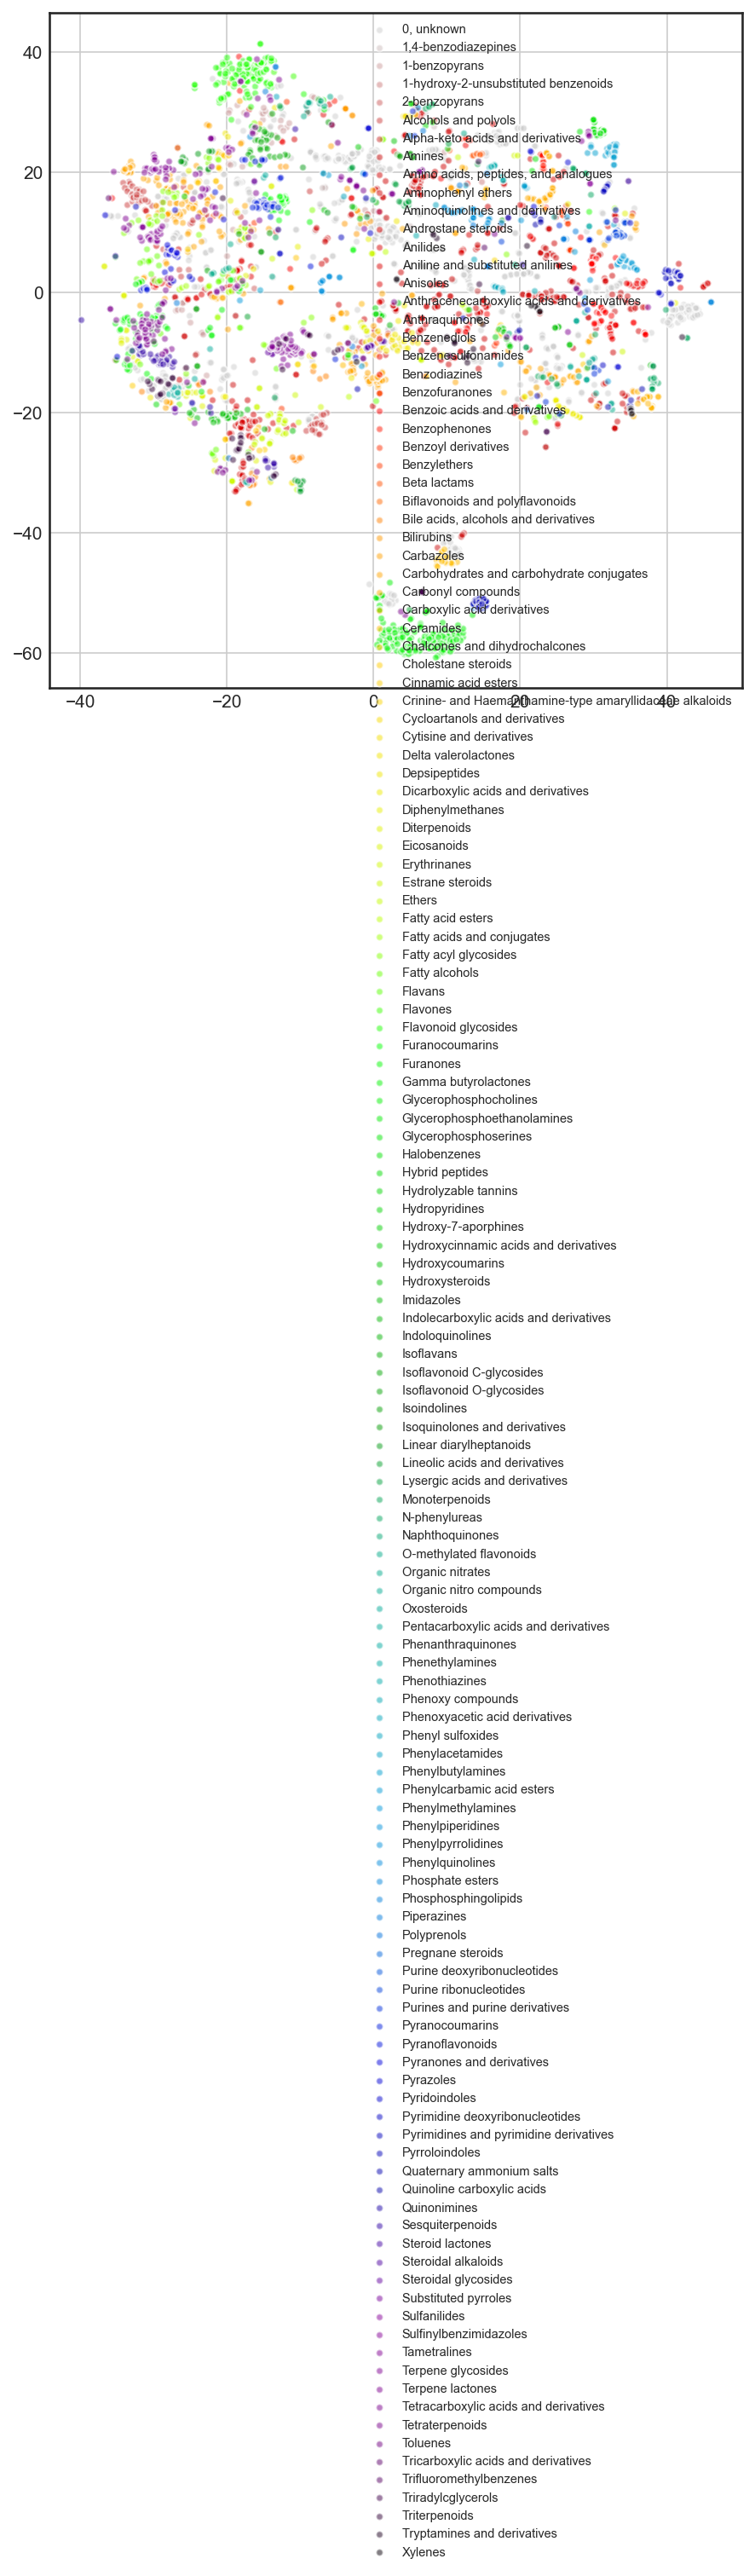

In [189]:
import matplotlib
cmap = matplotlib.cm.get_cmap("nipy_spectral_r") #"turbo") #"nipy_spectral") #'inferno')

N = np.unique(labels_test_subclass_str).shape[0]

fig, ax = plt.subplots(figsize=(7, 7), dpi=150)
for i, label in enumerate(np.unique(labels_test_subclass_str)):
    idx = np.where(np.array(labels_test_subclass_str) == label)[0]
    scale = 15
    ax.scatter(X_2d_cosine100[idx,1], X_2d_cosine100[idx,0], color=cmap(i/N), 
               s=scale, label=label,
               alpha=0.5, edgecolors='white')

ax.legend(fontsize=7)
ax.grid(True)
plt.tight_layout()
#plt.savefig("TSNE_testset_20210326-191145_Test_10k_500_500_200_classes_perplexity100.svg")